<a href="https://colab.research.google.com/github/DuyTa506/Machine-Learning/blob/main/Covid_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# COVID PREDICTION 

import library

In [ ]:
import matplotlib_inline.backend_inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn-poster')
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
from IPython.display import set_matplotlib_formats
import warnings
warnings.filterwarnings("ignore")

import the data in pages



In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-28-2021.csv')
apple_mobility = pd.read_csv("https://covid19-static.cdn-apple.com/covid19-mobility-data/2201HotfixDev8/v3/en-us/applemobilitytrends-2021-10-28.csv")

In [ ]:
#print(confirmed_df.head())
print(confirmed_df)

    Province/State      Country/Region        Lat  ...  11/5/21  11/6/21  11/7/21
0              NaN         Afghanistan  33.939110  ...   156392   156397   156397
1              NaN             Albania  41.153300  ...   187994   187994   189125
2              NaN             Algeria  28.033900  ...   206995   207079   207156
3              NaN             Andorra  42.506300  ...    15618    15618    15618
4              NaN              Angola -11.202700  ...    64612    64654    64674
..             ...                 ...        ...  ...      ...      ...      ...
275            NaN             Vietnam  14.058324  ...   953547   961038   968684
276            NaN  West Bank and Gaza  31.952200  ...   455099   455099   455099
277            NaN               Yemen  15.552727  ...     9843     9858     9870
278            NaN              Zambia -13.133897  ...   209852   209869   209902
279            NaN            Zimbabwe -19.015438  ...   133112   133168   133187

[280 rows x 660

In [ ]:
cols = confirmed_df.keys() 
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/29/21', '10/30/21', '10/31/21', '11/1/21', '11/2/21', '11/3/21',
       '11/4/21', '11/5/21', '11/6/21', '11/7/21'],
      dtype='object', length=660)


Get data day by day

In [ ]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
print(confirmed)
print(deaths)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  11/4/21  11/5/21  11/6/21  11/7/21
0          0        0        0        0  ...   156363   156392   156397   156397
1          0        0        0        0  ...   187363   187994   187994   189125
2          0        0        0        0  ...   206878   206995   207079   207156
3          0        0        0        0  ...    15618    15618    15618    15618
4          0        0        0        0  ...    64583    64612    64654    64674
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
275        0        2        2        2  ...   946043   953547   961038   968684
276        0        0        0        0  ...   454799   455099   455099   455099
277        0        0        0        0  ...     9831     9843     9858     9870
278        0        0        0        0  ...   209815   209852   209869   209902
279        0        0        0        0  ...   133112   133112   133168   133187

[280 rows x 656 columns]
  

Lấy tất cả các  ngày bắt đầu từ lúc bùng phát dịch 

In [ ]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
print(confirmed)
# recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

     1/22/20  1/23/20  1/24/20  1/25/20  ...  11/4/21  11/5/21  11/6/21  11/7/21
0          0        0        0        0  ...   156363   156392   156397   156397
1          0        0        0        0  ...   187363   187994   187994   189125
2          0        0        0        0  ...   206878   206995   207079   207156
3          0        0        0        0  ...    15618    15618    15618    15618
4          0        0        0        0  ...    64583    64612    64654    64674
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
275        0        2        2        2  ...   946043   953547   961038   968684
276        0        0        0        0  ...   454799   455099   455099   455099
277        0        0        0        0  ...     9831     9843     9858     9870
278        0        0        0        0  ...   209815   209852   209869   209902
279        0        0        0        0  ...   133112   133112   133168   133187

[280 rows x 656 columns]


In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
# recovery_rate = [] 
# total_recovered = [] 
# total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    #print(confirmed_sum)
    #print(world_cases)
    total_deaths.append(death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
#     recovery_rate.append(recovered_sum/confirmed_sum)

Lấy giá trị tăng hằng ngày và giá trị tăng trung bình


In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, size_of_week):
    moving_average = []
    for i in range(len(data)):
        if i + size_of_week < len(data):
            moving_average.append(np.mean(data[i:i+size_of_week]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# Size of week
size_of_week = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, size_of_week)
print(world_confirmed_avg)
world_daily_increase_avg = moving_average(world_daily_increase, size_of_week)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, size_of_week)
world_daily_death_avg = moving_average(world_daily_death, size_of_week)


# recoveries
# world_daily_recovery = daily_increase(total_recovered)
# world_recovery_avg = moving_average(total_recovered, size_of_week)
# world_daily_recovery_avg = moving_average(world_daily_recovery, size_of_week)


# active 
# world_active_avg = moving_average(total_active, size_of_week)

[2030.0, 2831.4285714285716, 3914.285714285714, 5198.0, 6712.857142857143, 8808.42857142857, 11231.285714285714, 13848.42857142857, 16916.428571428572, 20140.714285714286, 23636.714285714286, 27221.285714285714, 30560.428571428572, 33829.28571428572, 36816.857142857145, 39329.142857142855, 43554.28571428572, 48198.57142857143, 52758.857142857145, 57198.0, 61555.28571428572, 65889.71428571429, 70235.85714285714, 72497.42857142857, 73916.28571428571, 75280.57142857143, 76387.28571428571, 77284.42857142857, 78034.71428571429, 78853.14285714286, 79785.71428571429, 80826.71428571429, 81886.71428571429, 83232.14285714286, 84779.14285714286, 86575.71428571429, 88561.57142857143, 90755.85714285714, 93311.28571428571, 96181.42857142857, 99274.42857142857, 102681.71428571429, 106406.71428571429, 110897.42857142857, 115814.42857142857, 122222.85714285714, 129631.57142857143, 138088.7142857143, 148061.0, 159630.14285714287, 172898.42857142858, 189210.42857142858, 207882.42857142858, 229560.5714285

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
# total_recovered = np.array(total_recovered).reshape(-1, 1)

Dự đoán tương lai trong n ngày tiếp theo

In [ ]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]
#print(future_forcast)
#print(adjusted_dates)

Chuyển đổi số nguyên qua ngày tháng để dễ trực quan hóa 

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
#print(start_date)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
#print(future_forcast_dates)
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
days_to_skip = 365
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.08, shuffle=False)
print(days_since_1_22[days_to_skip:])

[[365]
 [366]
 [367]
 [368]
 [369]
 [370]
 [371]
 [372]
 [373]
 [374]
 [375]
 [376]
 [377]
 [378]
 [379]
 [380]
 [381]
 [382]
 [383]
 [384]
 [385]
 [386]
 [387]
 [388]
 [389]
 [390]
 [391]
 [392]
 [393]
 [394]
 [395]
 [396]
 [397]
 [398]
 [399]
 [400]
 [401]
 [402]
 [403]
 [404]
 [405]
 [406]
 [407]
 [408]
 [409]
 [410]
 [411]
 [412]
 [413]
 [414]
 [415]
 [416]
 [417]
 [418]
 [419]
 [420]
 [421]
 [422]
 [423]
 [424]
 [425]
 [426]
 [427]
 [428]
 [429]
 [430]
 [431]
 [432]
 [433]
 [434]
 [435]
 [436]
 [437]
 [438]
 [439]
 [440]
 [441]
 [442]
 [443]
 [444]
 [445]
 [446]
 [447]
 [448]
 [449]
 [450]
 [451]
 [452]
 [453]
 [454]
 [455]
 [456]
 [457]
 [458]
 [459]
 [460]
 [461]
 [462]
 [463]
 [464]
 [465]
 [466]
 [467]
 [468]
 [469]
 [470]
 [471]
 [472]
 [473]
 [474]
 [475]
 [476]
 [477]
 [478]
 [479]
 [480]
 [481]
 [482]
 [483]
 [484]
 [485]
 [486]
 [487]
 [488]
 [489]
 [490]
 [491]
 [492]
 [493]
 [494]
 [495]
 [496]
 [497]
 [498]
 [499]
 [500]
 [501]
 [502]
 [503]
 [504]
 [505]
 [506]
 [507]

Mô đun để dự đoán số ca nhiễm toàn cầu,tôi sẽ dùng :
- Support Vector Regressor
- Polynomial Regression
- Bayesian Ridge


#SUPPORTED VECTORS REGRESSION

In [ ]:

# # use this to find the optimal parameters for SVR
#c = [0.01, 0.1, 1]
#gamma = [0.01, 0.1, 1]
#epsilon = [0.01, 0.1, 1]
#shrinking = [True, False]

#svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

#svm = SVR(kernel='poly', degree=3)
#svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
#svm_search.fit(X_train_confirmed, y_train_confirmed)

In [ ]:
#svm_search.best_params_

In [ ]:
# svm_confirmed = svm_search.best_estimator_ (lay)
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 21997493.315524403
MSE: 495333895502597.5


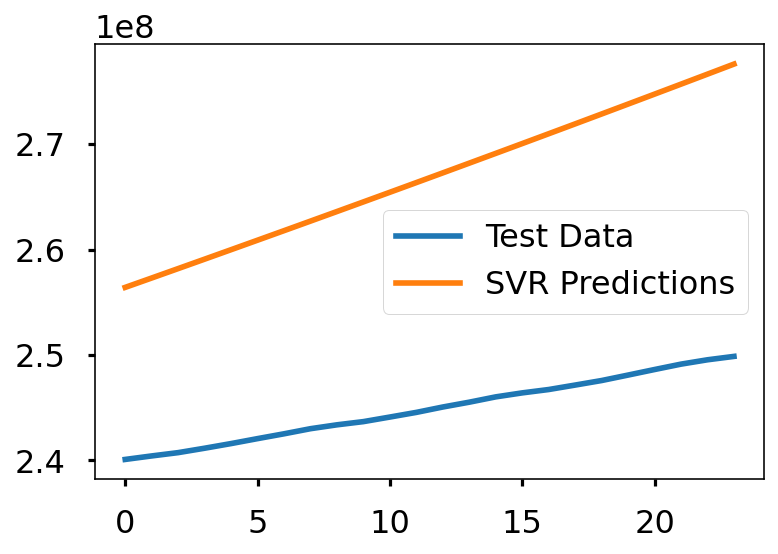

In [ ]:
# check against testing data (lay)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVR Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

#POLYNOMIAL REGRESSION



In [ ]:
# transform our data for polynomial regression (lay)
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)


In [ ]:
# polynomial regression (lay)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 980224.954498902
MSE: 1051274344483.1718


In [ ]:
print(linear_model.coef_)

[[ 4.71136193e+07 -4.10920758e+05  1.98240152e+03 -1.34234748e+00]]


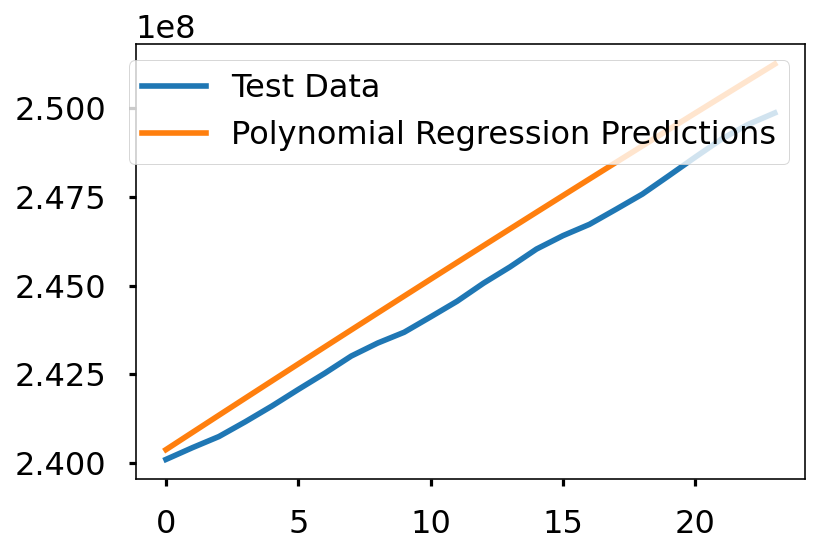

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
 from sklearn.metrics import r2_score
 print(r2_score(y_test_confirmed,test_linear_pred))

0.882490410176338



#BAYESIAN RIDGE



In [ ]:
bayesian_poly = PolynomialFeatures(degree=2)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [ ]:
# bayesian ridge polynomial regression (Lay)
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=2, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.5s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                  

In [ ]:
bayesian_search.best_params_ #(Lay)

{'alpha_1': 0.001,
 'alpha_2': 1e-05,
 'lambda_1': 1e-07,
 'lambda_2': 1e-07,
 'normalize': False,
 'tol': 1e-06}

In [ ]:
bayesian_confirmed = bayesian_search.best_estimator_ #(Lay)
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 9381997.781401059
MSE: 90764866623435.22


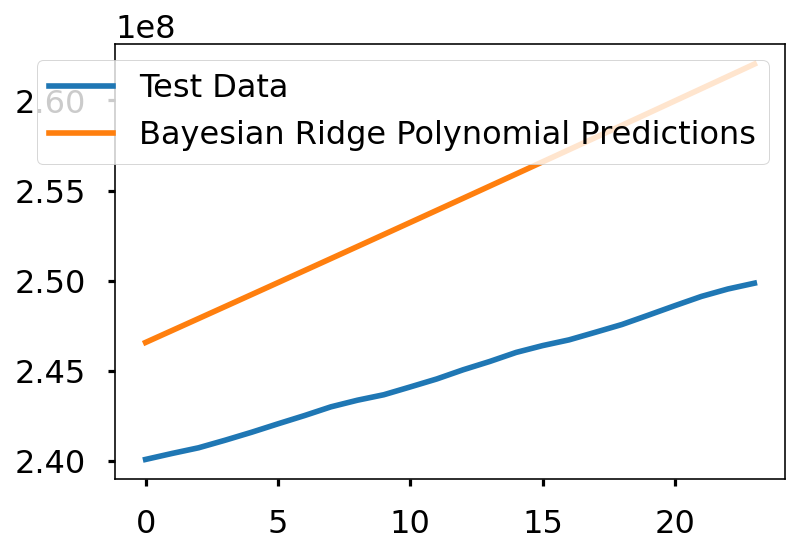

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

#Tổng quan thế giới
Biểu đồ số trường hợp được xác nhận, tử vong và tỷ lệ tử vong (CFR). 
Điều này cho chúng ta một bức tranh toàn cảnh về đại dịch đang diễn ra.

In [ ]:
# làm phẳng dữ liệu để đường đồ thị smooth hơn 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

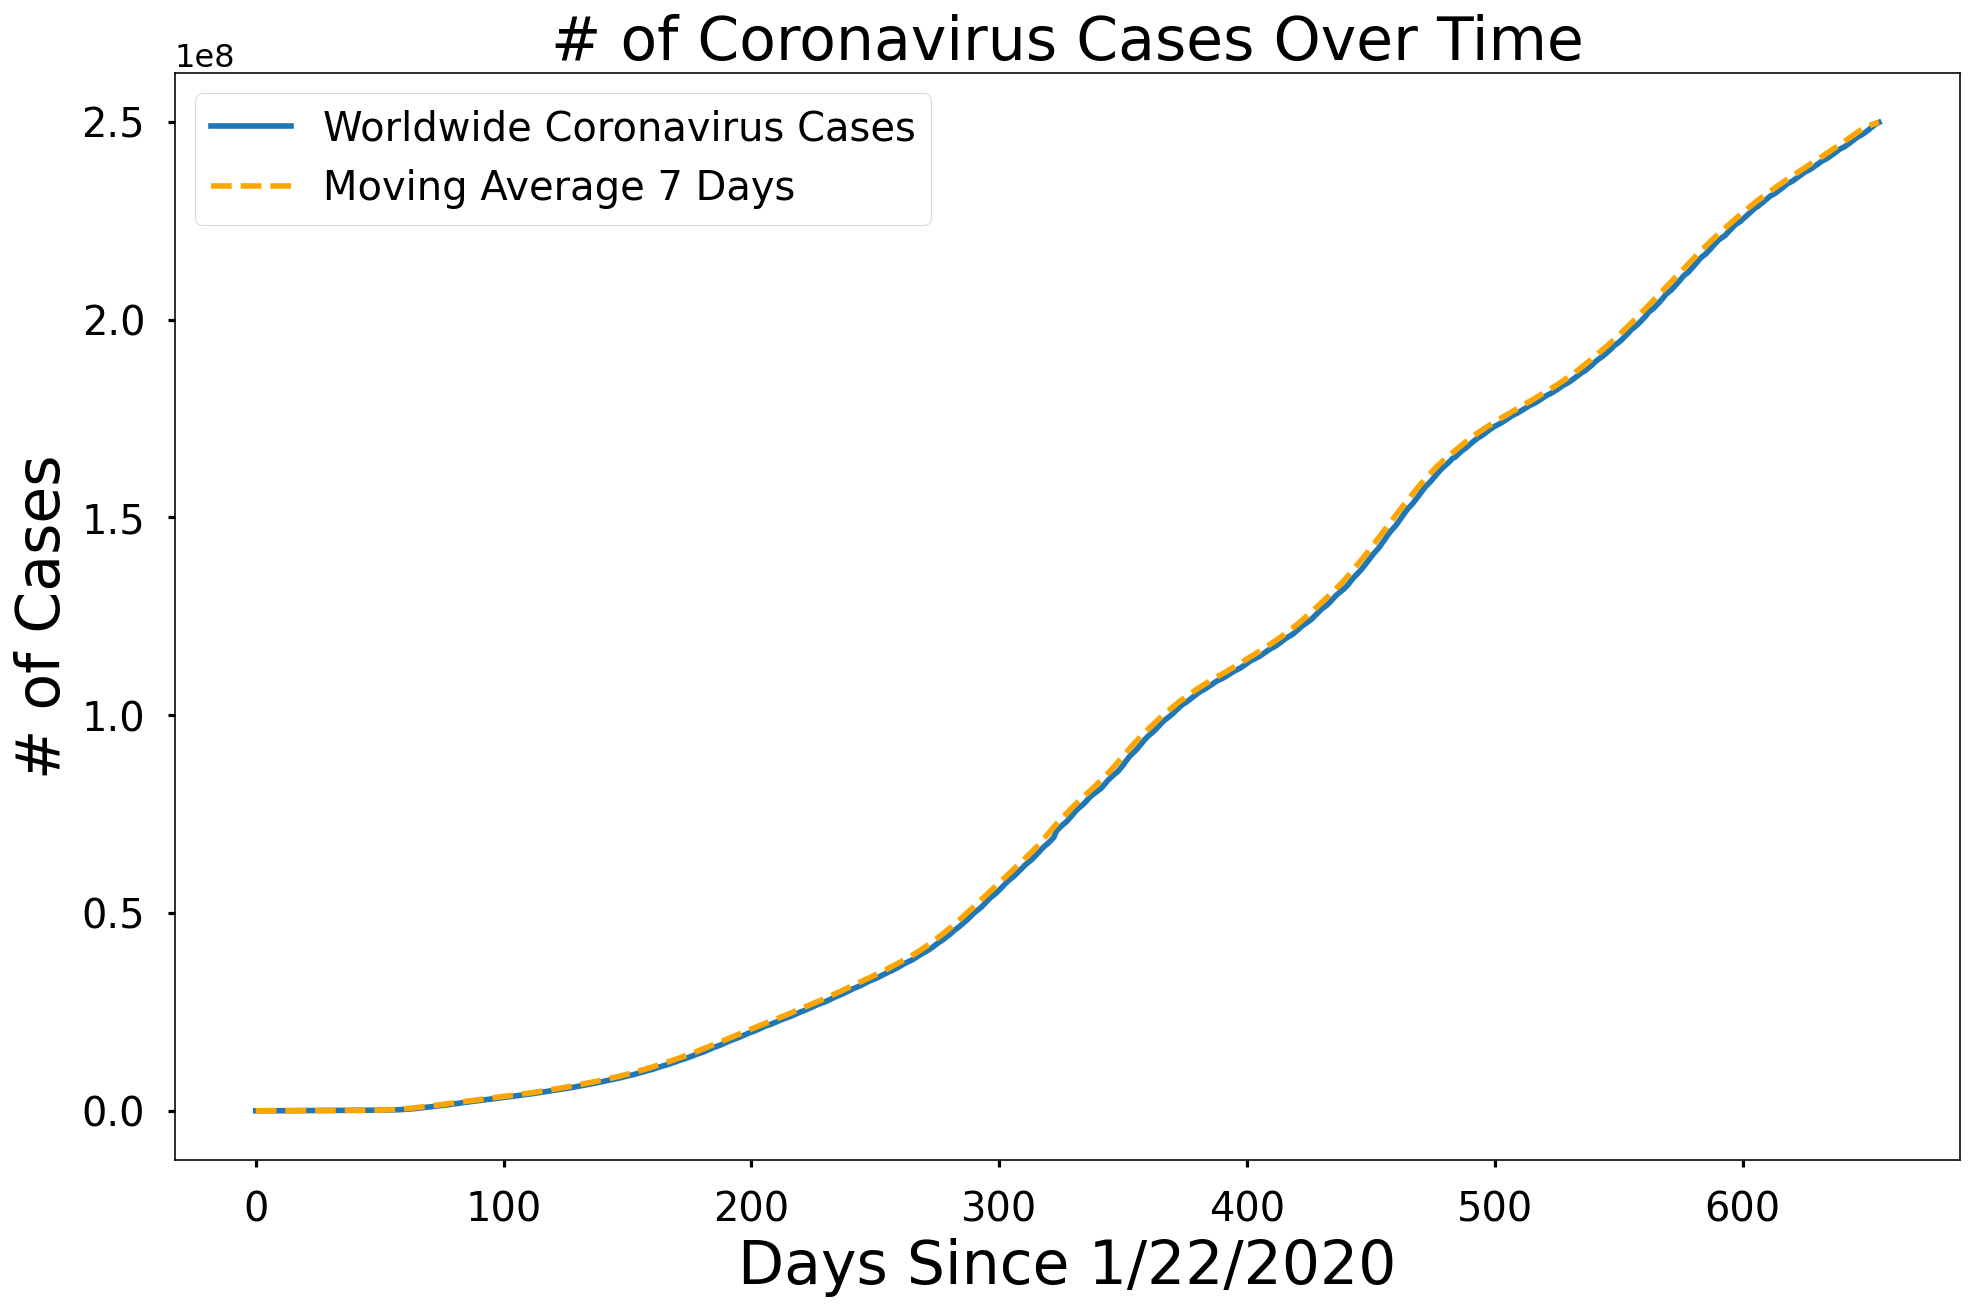

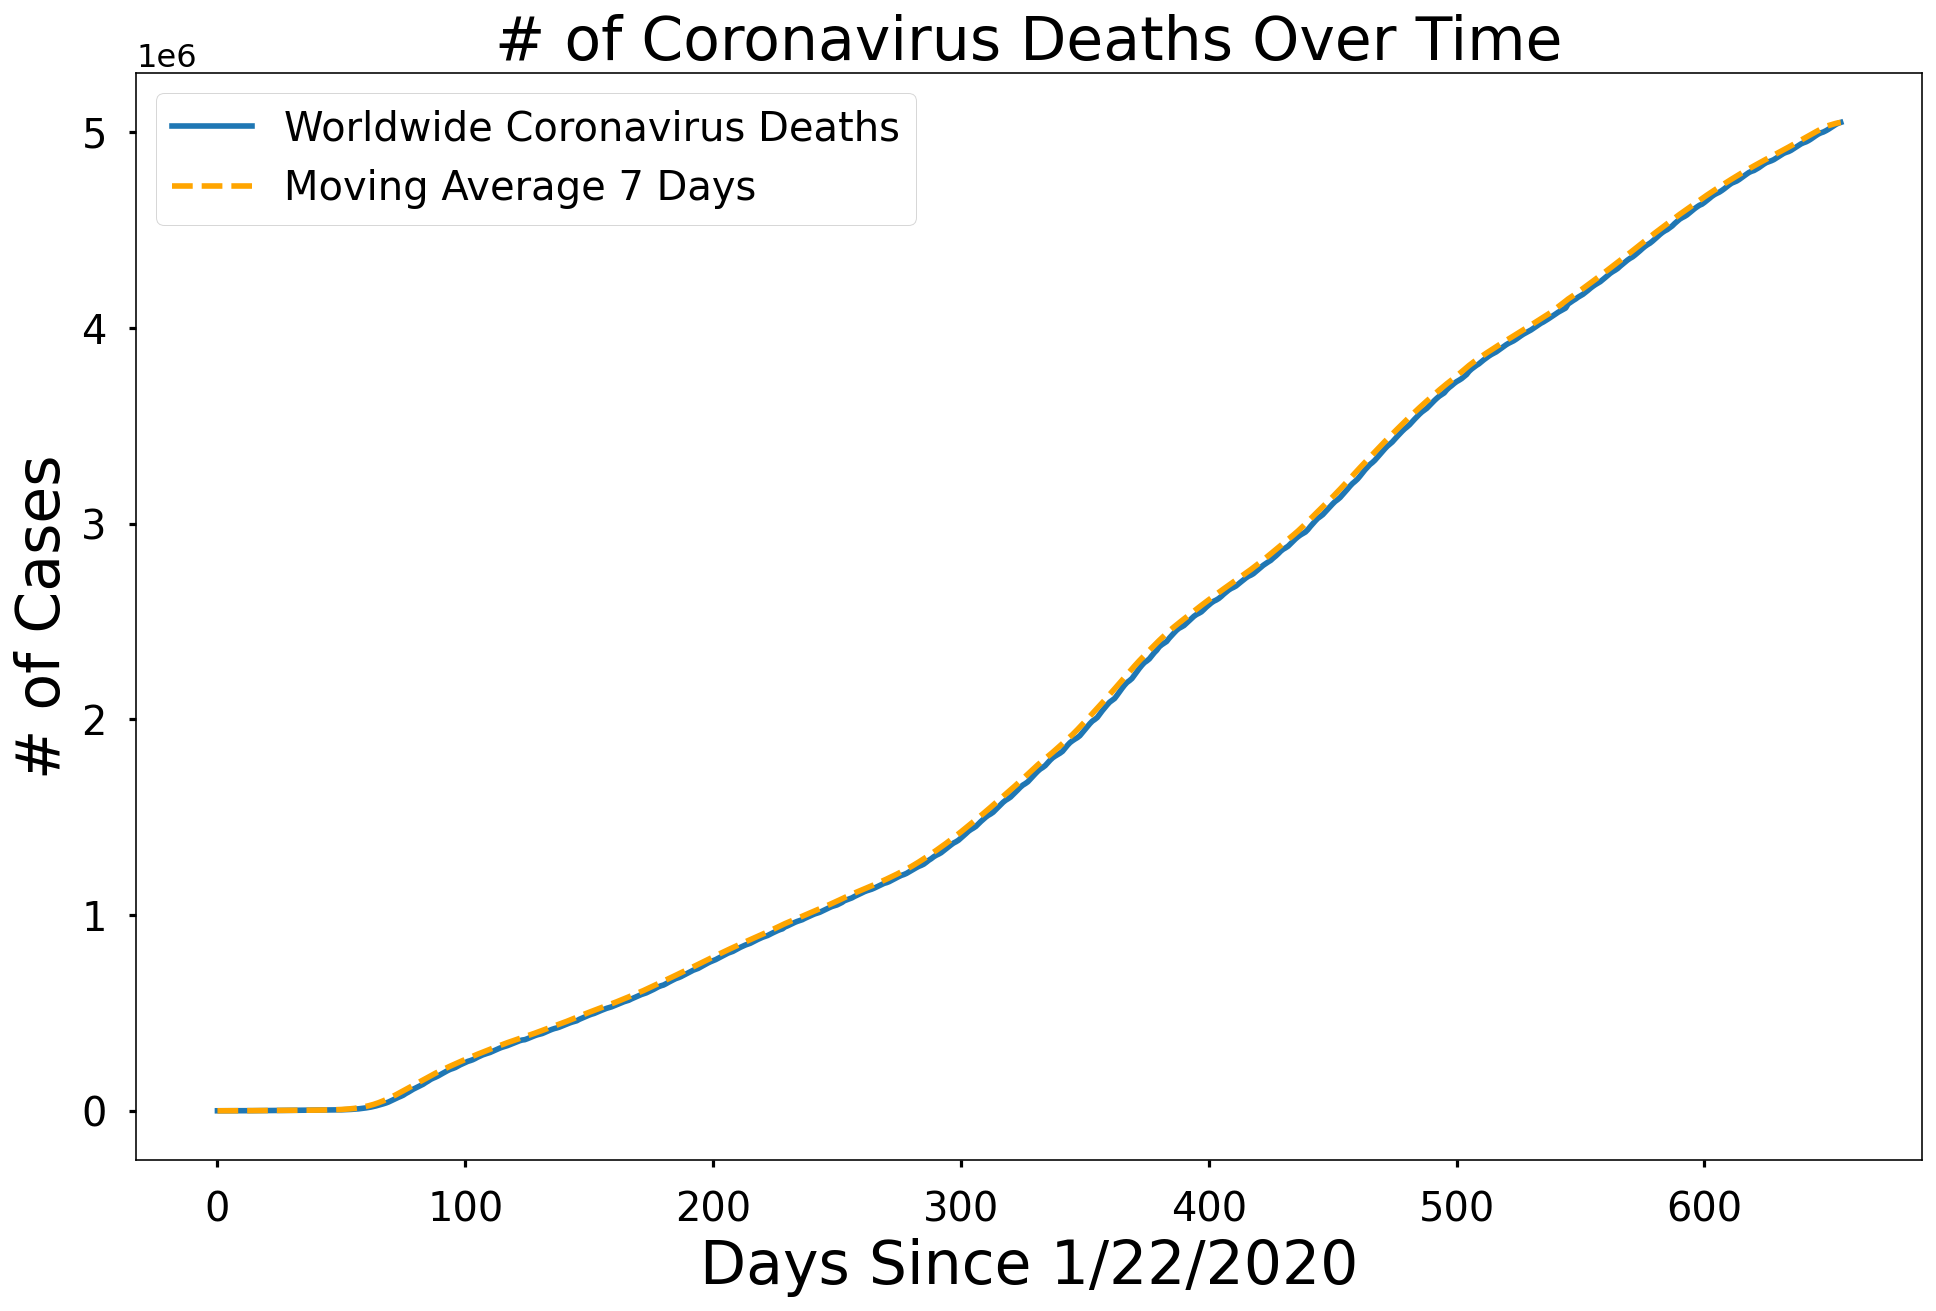

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(size_of_week)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(size_of_week)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# plt.figure(figsize=(16, 10))
# plt.plot(adjusted_dates, total_recovered)
# plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='orange')
# plt.title('# of Coronavirus Recoveries Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

# plt.figure(figsize=(16, 10))
# plt.plot(adjusted_dates, total_active)
# plt.plot(adjusted_dates, world_active_avg, linestyle='dashed', color='orange')
# plt.title('# of Coronavirus Active Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Active Cases', size=30)
# plt.legend(['Worldwide Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

#Dự đoán ca nhiễm cho tương lai.
3 mô hình trên sẽ dự đoán toàn cầu.
Các mô hình bao gồm 

Support Vector Regression
Polynomial Regression
Bayesian Ridge Regression

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

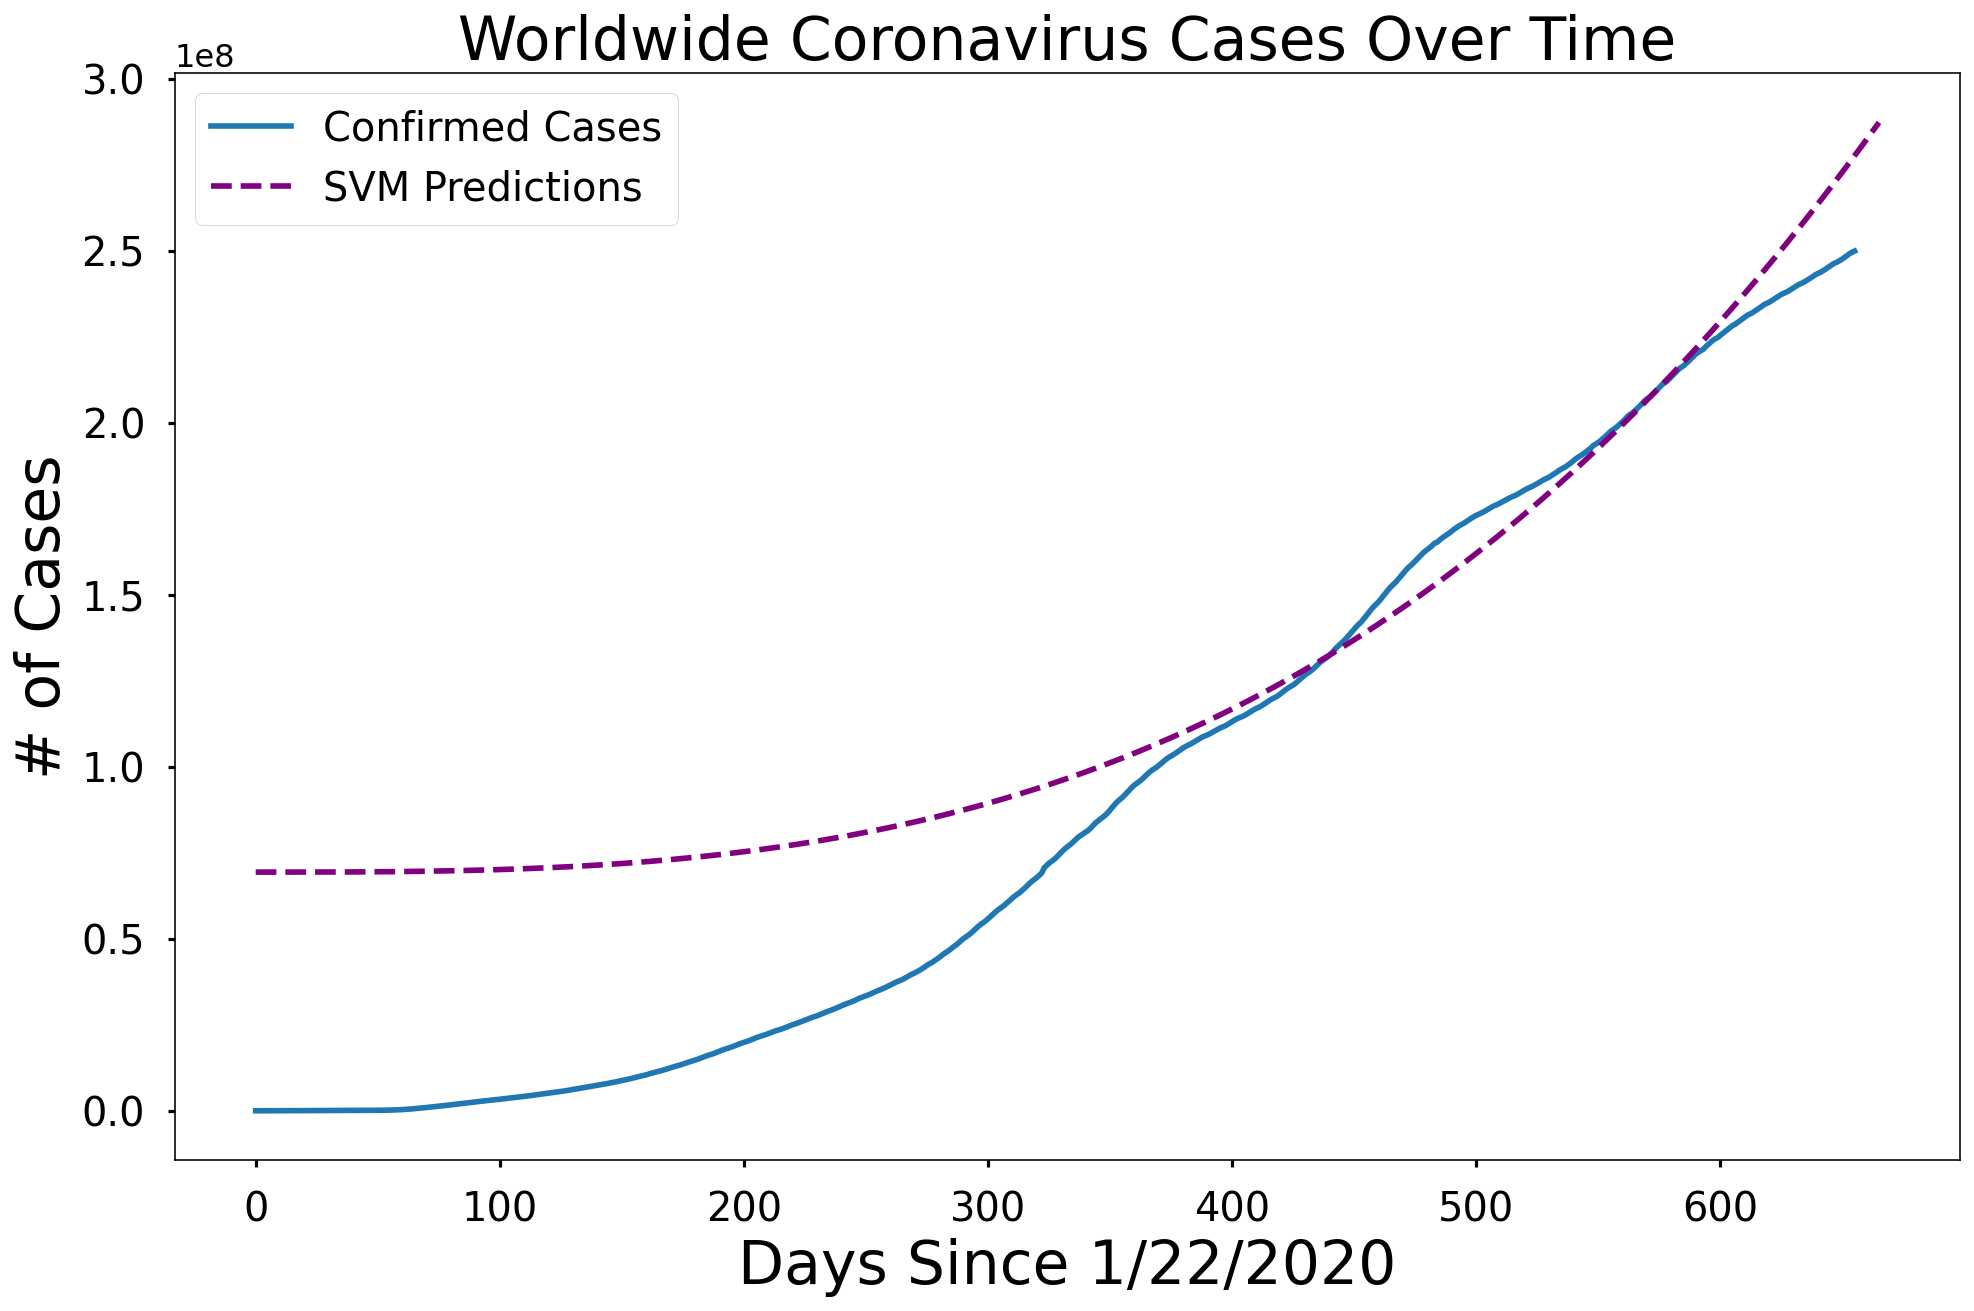

In [ ]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,11/08/2021,278540275.000000
1,11/09/2021,279498297.000000
2,11/10/2021,280459240.000000
3,11/11/2021,281423108.000000
4,11/12/2021,282389905.000000
5,11/13/2021,283359637.000000
6,11/14/2021,284332307.000000
7,11/15/2021,285307921.000000
8,11/16/2021,286286481.000000
9,11/17/2021,287267994.000000


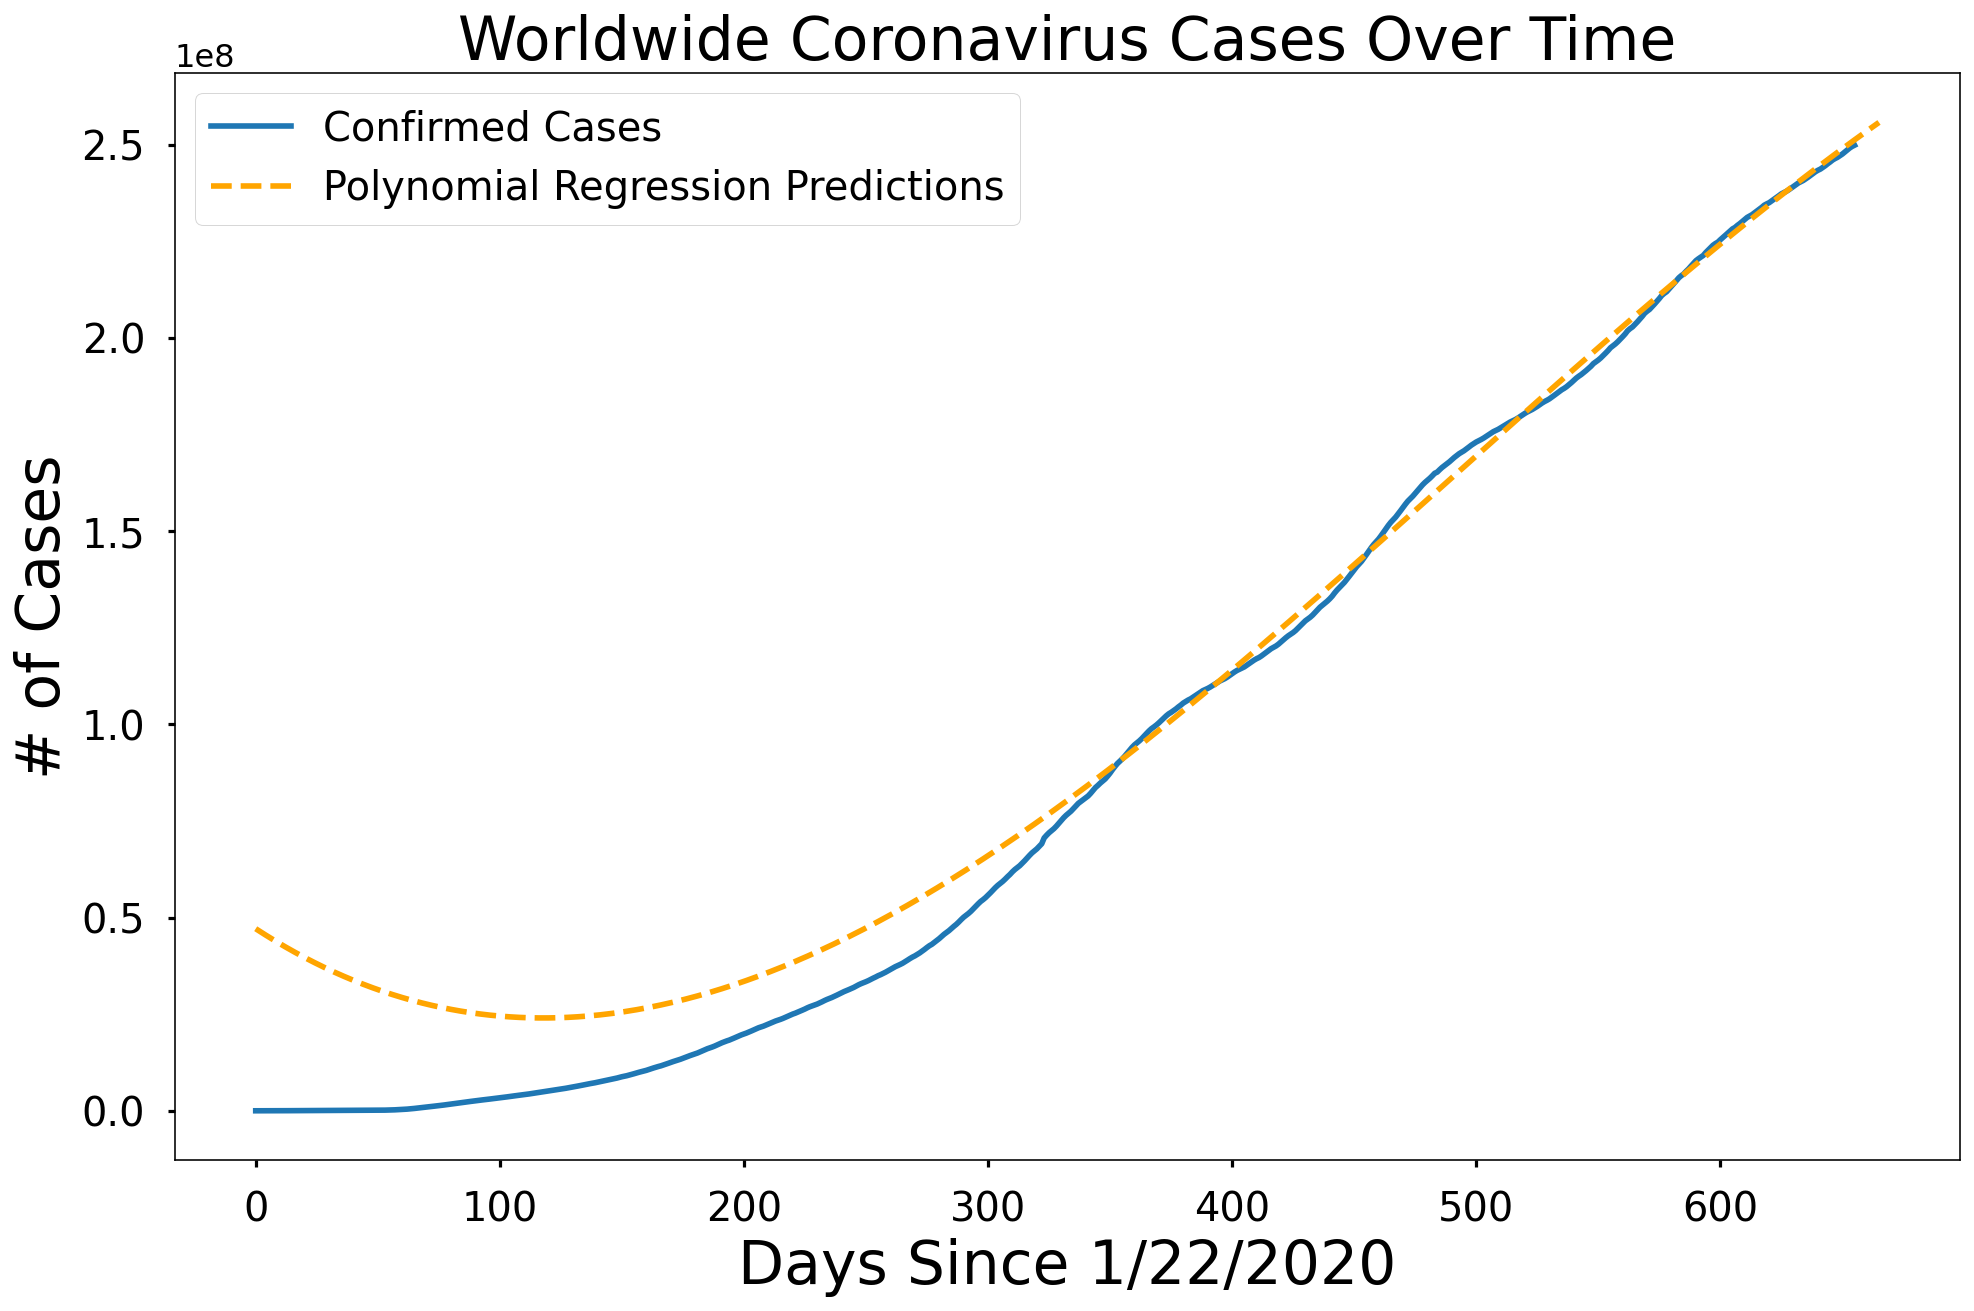

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of Confirmed Cases Worldwide
0,11/08/2021,251703093.000000
1,11/09/2021,252159441.000000
2,11/10/2021,252614462.000000
3,11/11/2021,253068149.000000
4,11/12/2021,253520492.000000
5,11/13/2021,253971485.000000
6,11/14/2021,254421119.000000
7,11/15/2021,254869386.000000
8,11/16/2021,255316278.000000
9,11/17/2021,255761786.000000


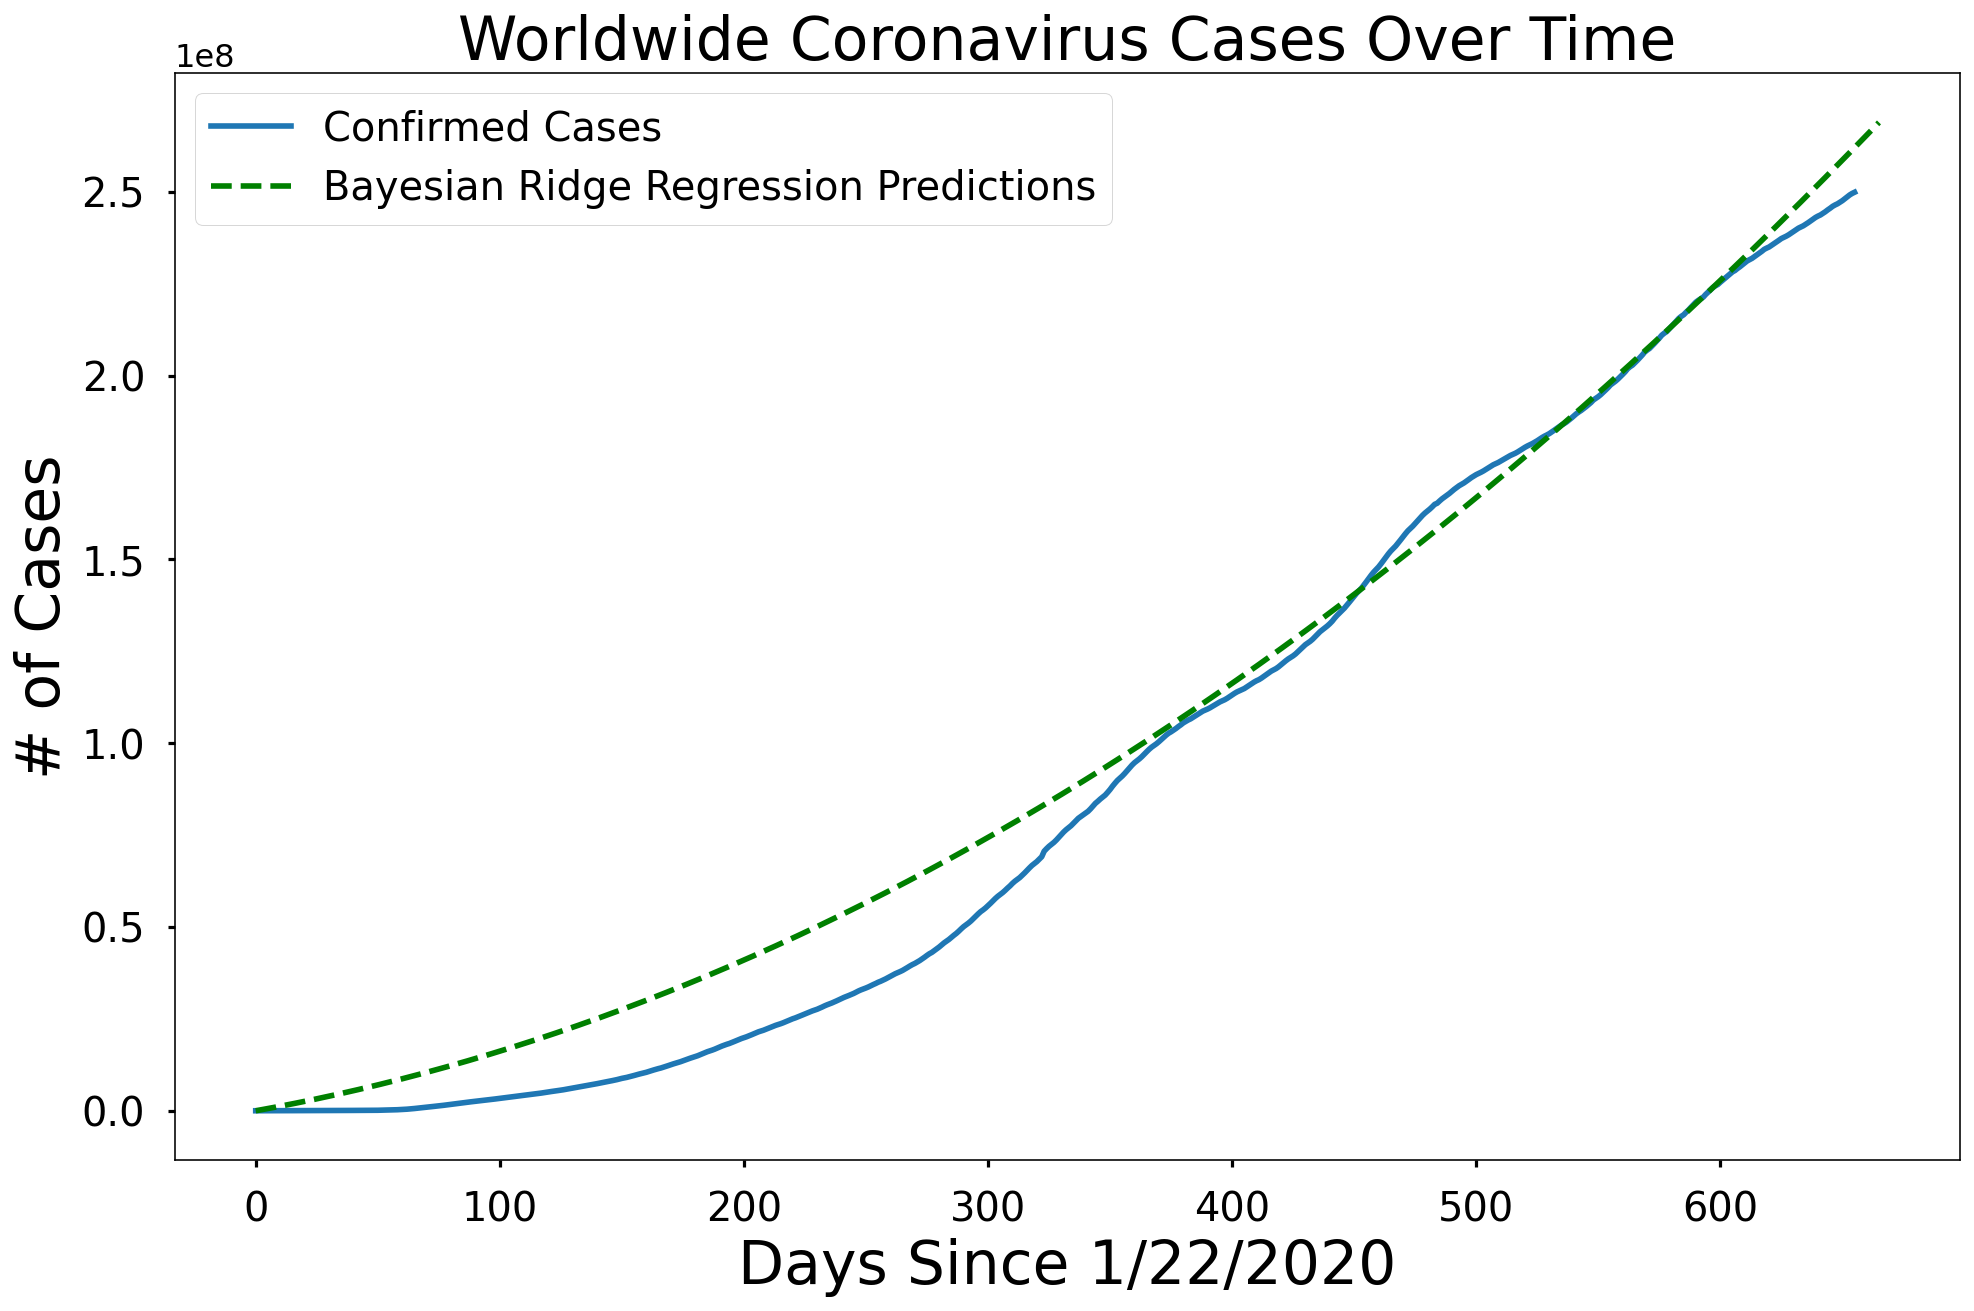

In [ ]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [ ]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

,Date,Bayesian Ridge Predicted # of Confirmed Cases Worldwide
0,11/08/2021,262695654.000000
1,11/09/2021,263377721.000000
2,11/10/2021,264060646.000000
3,11/11/2021,264744428.000000
4,11/12/2021,265429068.000000
5,11/13/2021,266114565.000000
6,11/14/2021,266800919.000000
7,11/15/2021,267488130.000000
8,11/16/2021,268176198.000000
9,11/17/2021,268865124.000000


OVERVIEW VỀ VIỆTNAM


---



In [ ]:
def country_plot(x, y1, y2, y3, country):
    confirmed_avg = moving_average(y1, size_of_week)
    confirmed_increase_avg = moving_average(y2, size_of_week)
    death_increase_avg = moving_average(y3, size_of_week)
#     recovery_increase_avg = moving_average(y4, size_of_weekweek)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(size_of_week)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(size_of_week), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(size_of_week), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

#     plt.figure(figsize=(16, 10))
#     plt.bar(x, y4)
#     plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
#     plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
#     plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
#     plt.xlabel('Days Since 1/22/2020', size=30)
#     plt.ylabel('# of Cases', size=30)
#     plt.xticks(size=20)
#     plt.yticks(size=20)
#     plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)
    

Đồ thị cho Việt Nam

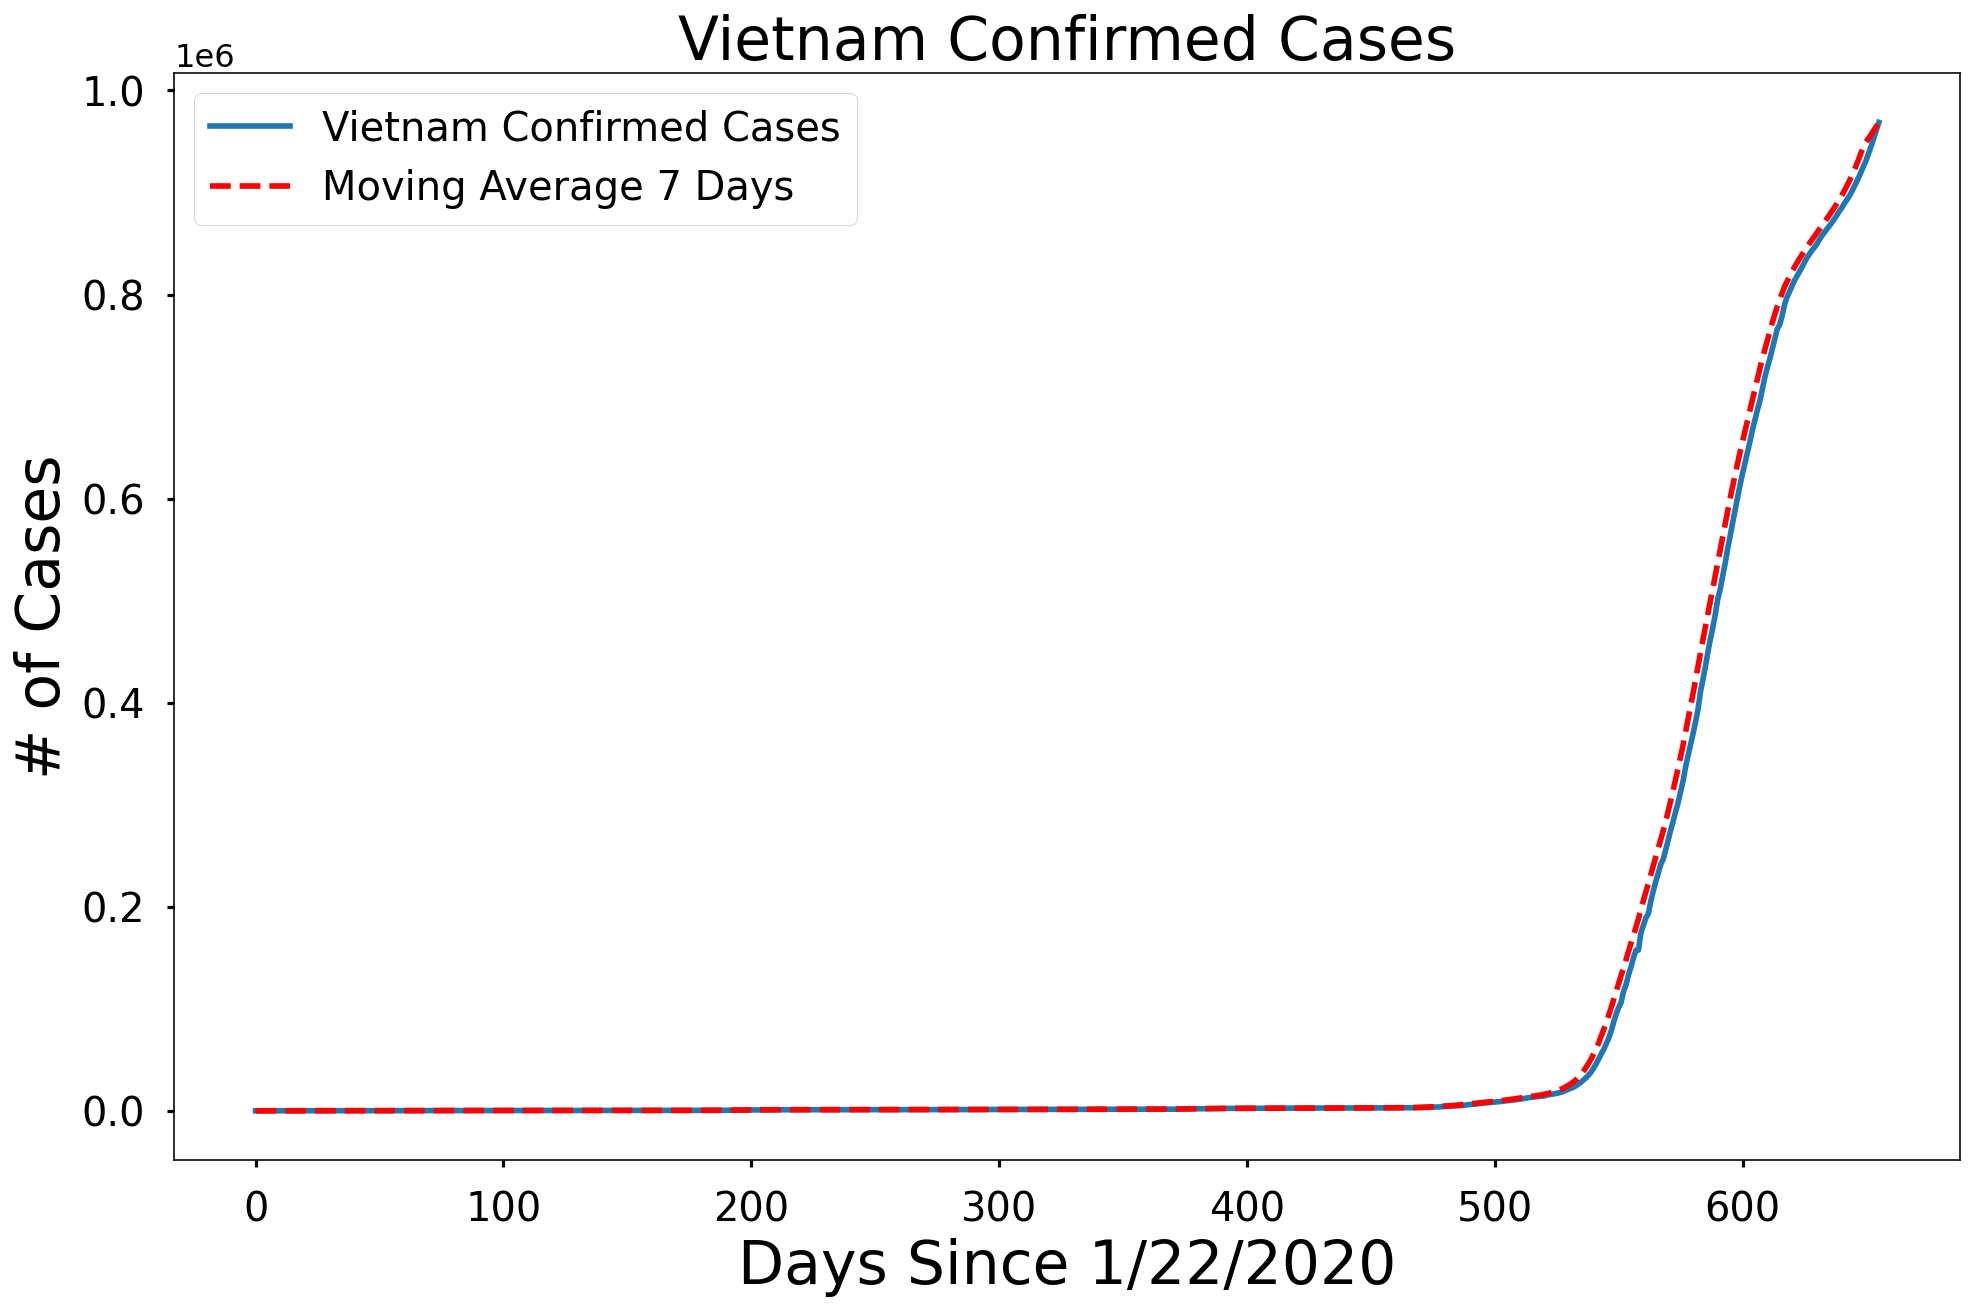

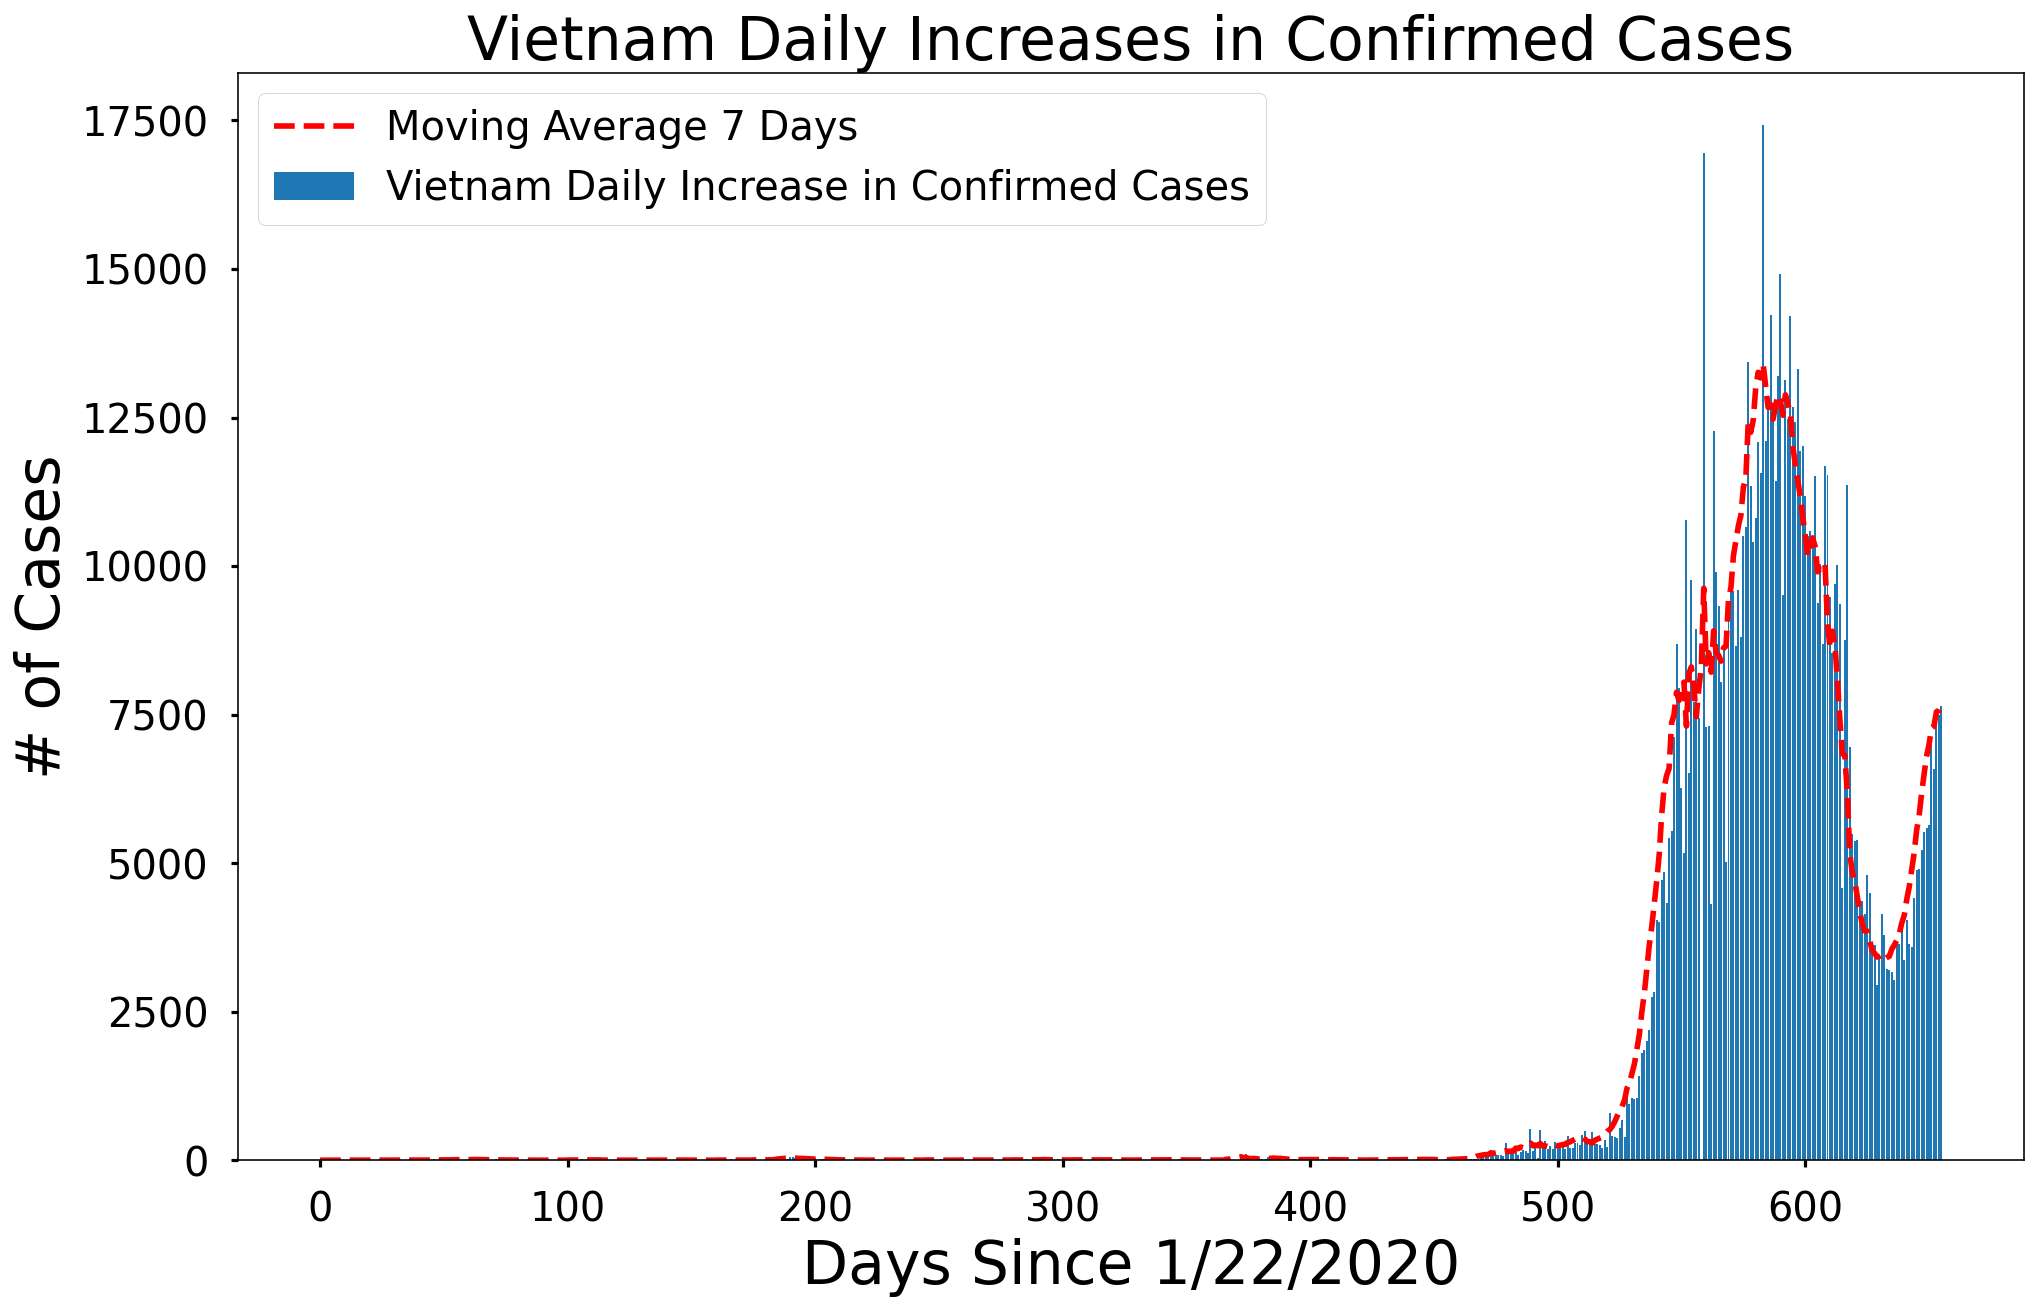

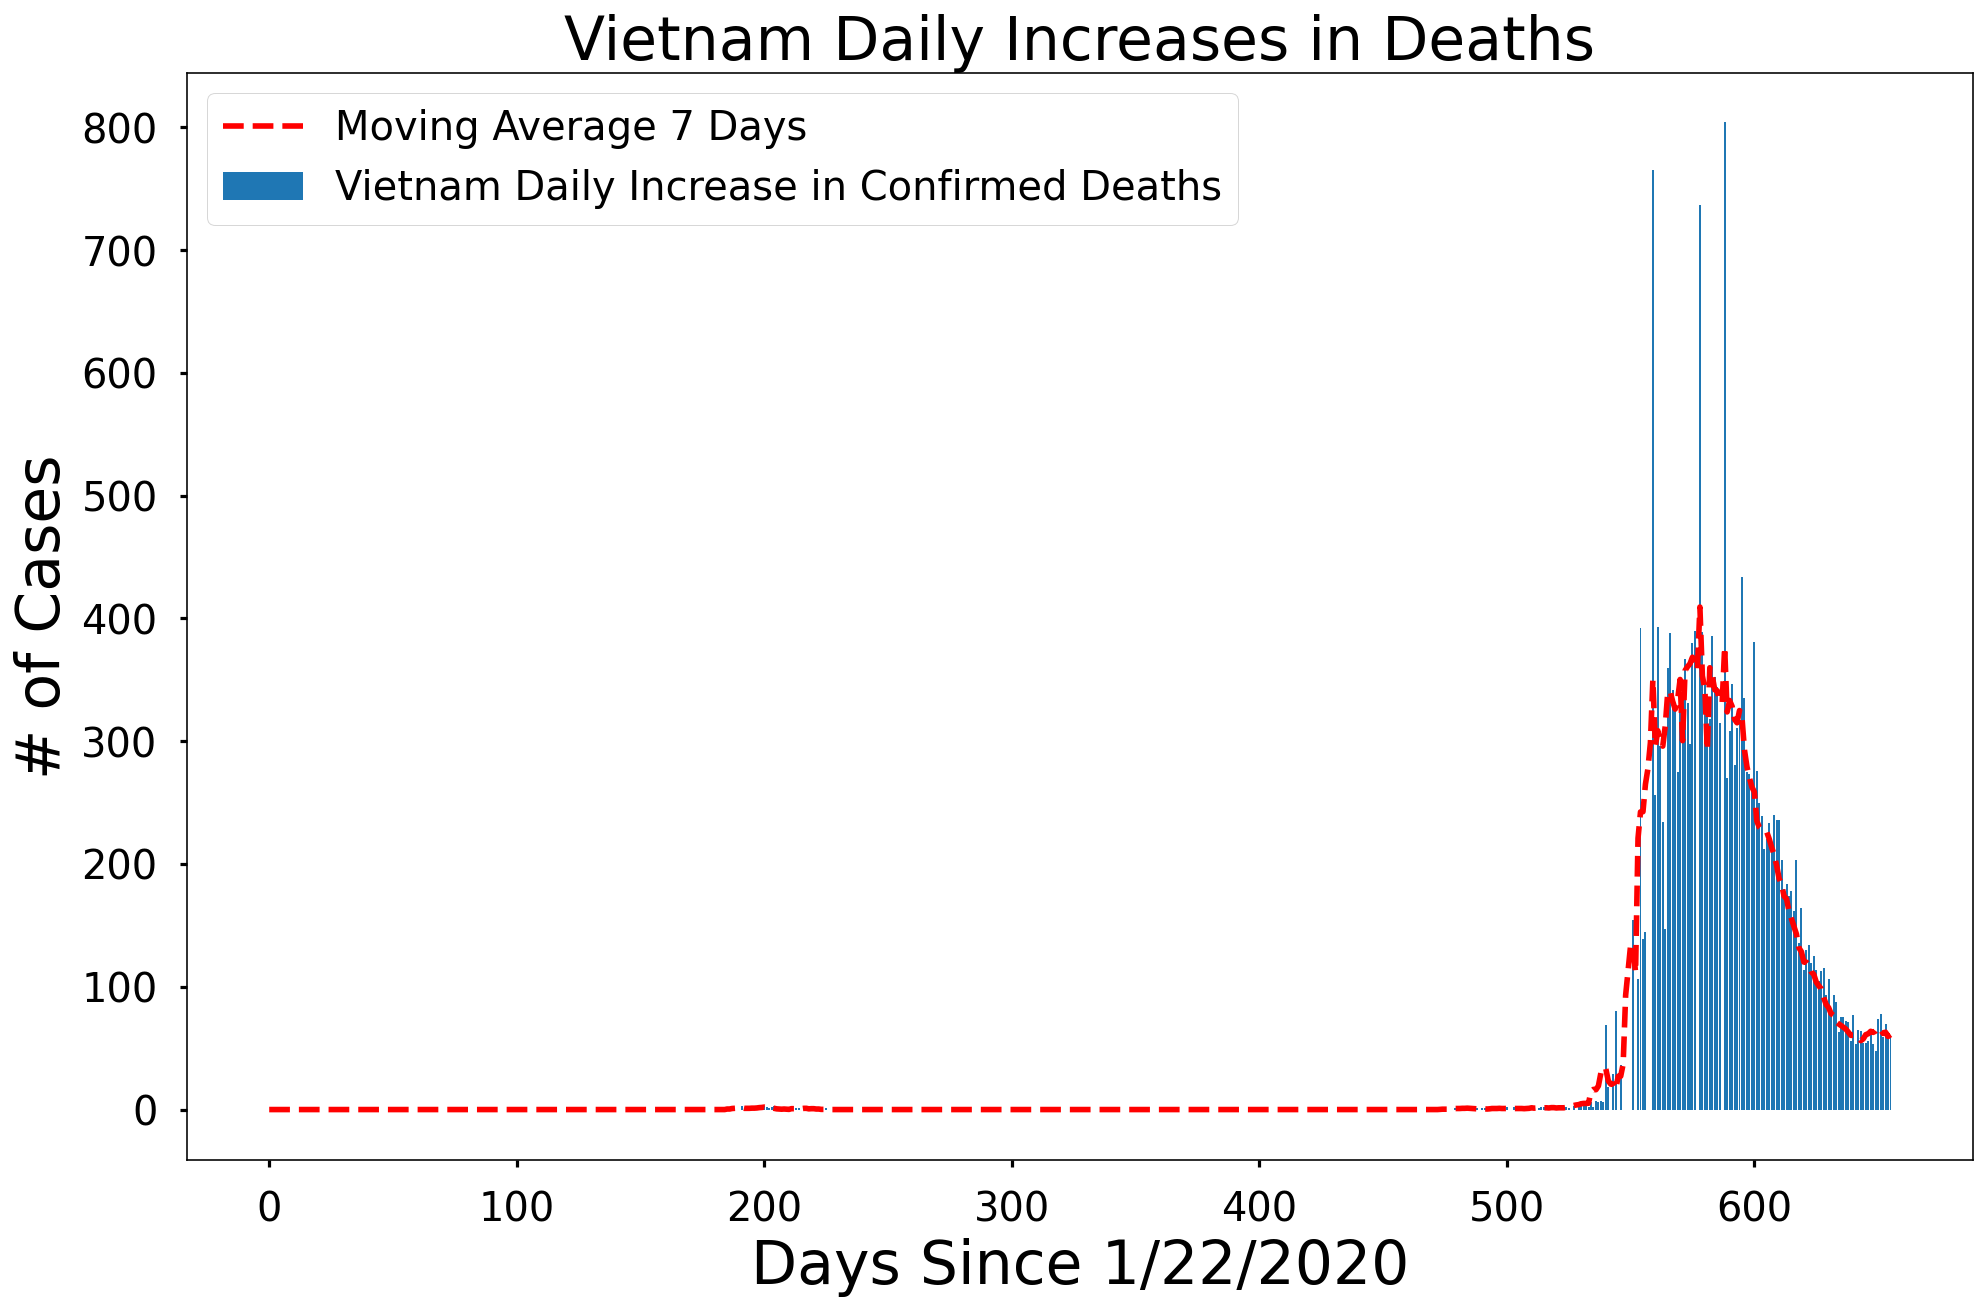

In [ ]:
 country_visualizations('Vietnam')

#Dự đoán cho Việt Nam 

In [ ]:
Vietnam_info = get_country_info('Vietnam')


In [ ]:
Vietnam_cases=Vietnam_info[0]
Vietnam_deaths=Vietnam_info[1]
#print(Vietnam_case)
Vietnam_daily_increase = daily_increase(Vietnam_cases)
print(Vietnam_daily_increase)
#print(X_train_confirmed)
print(Vietnam_cases)
print(Vietnam_deaths)

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 2, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 12, 0, 1, 7, 1, 8, 6, 3, 5, 5, 9, 10, 6, 3, 19, 10, 11, 7, 12, 10, 11, 14, 15, 9, 6, 15, 4, 3, 1, 4, 4, 2, 4, 2, 1, 4, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 24, 2, 4, 2, 4, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 7, 7, 0, 0, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 1, 0, 2, 1, 0, 8, 0, 1, 0, 1, 1, 17, 7, 4, 3, 2, 3, 11, 15, 13, 50, 49, 32, 31, 31, 20, 45, 33, 39, 23, 29, 6, 19, 17, 28, 19, 21, 13, 19, 6, 5, 13, 2, 5, 2, 6, 7, 5, 2, 2, 2, 0, 4, 0, 2, 0, 3, 0, 0, 0, 5, 5, 0, 1, 0, 3, 0, 0, 0, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 5, 3, 17, 0, 1, 1, 0, 0, 1, 1, 1, 1, 5, 2, 2, 1, 3, 9, 2, 0, 2, 8, 6, 1, 3, 4, 0, 12, 8, 1, 3, 1, 4, 0, 3, 0, 12, 10, 1, 4, 5, 1, 0, 2, 11, 26, 1, 3, 9, 16, 2, 5, 12, 4, 1, 1, 1, 5, 4, 5, 10, 8, 2, 2, 4, 4, 7, 3, 0,

#Start training with Polynomial Regression (Confirmed)

In [ ]:
# transform our data for polynomial regression
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[0:], Vietnam_cases[0:], test_size=0.1, random_state=0) 
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)


In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 58116.67067004125
MSE: 5096902982.355489


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test_confirmed,test_linear_pred))

0.9143392288722042


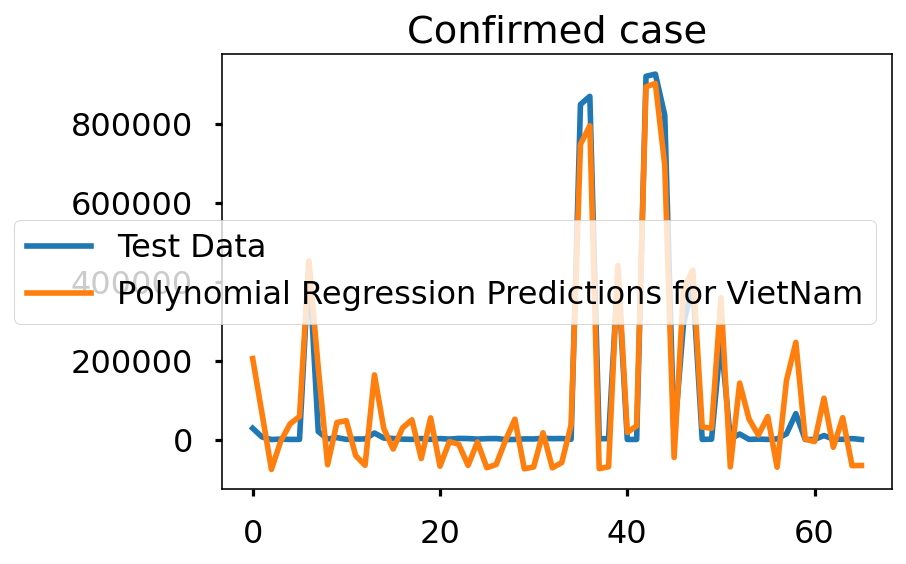

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.title('Confirmed case')
plt.legend(['Test Data', 'Polynomial Regression Predictions for VietNam'])

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('VietNam Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

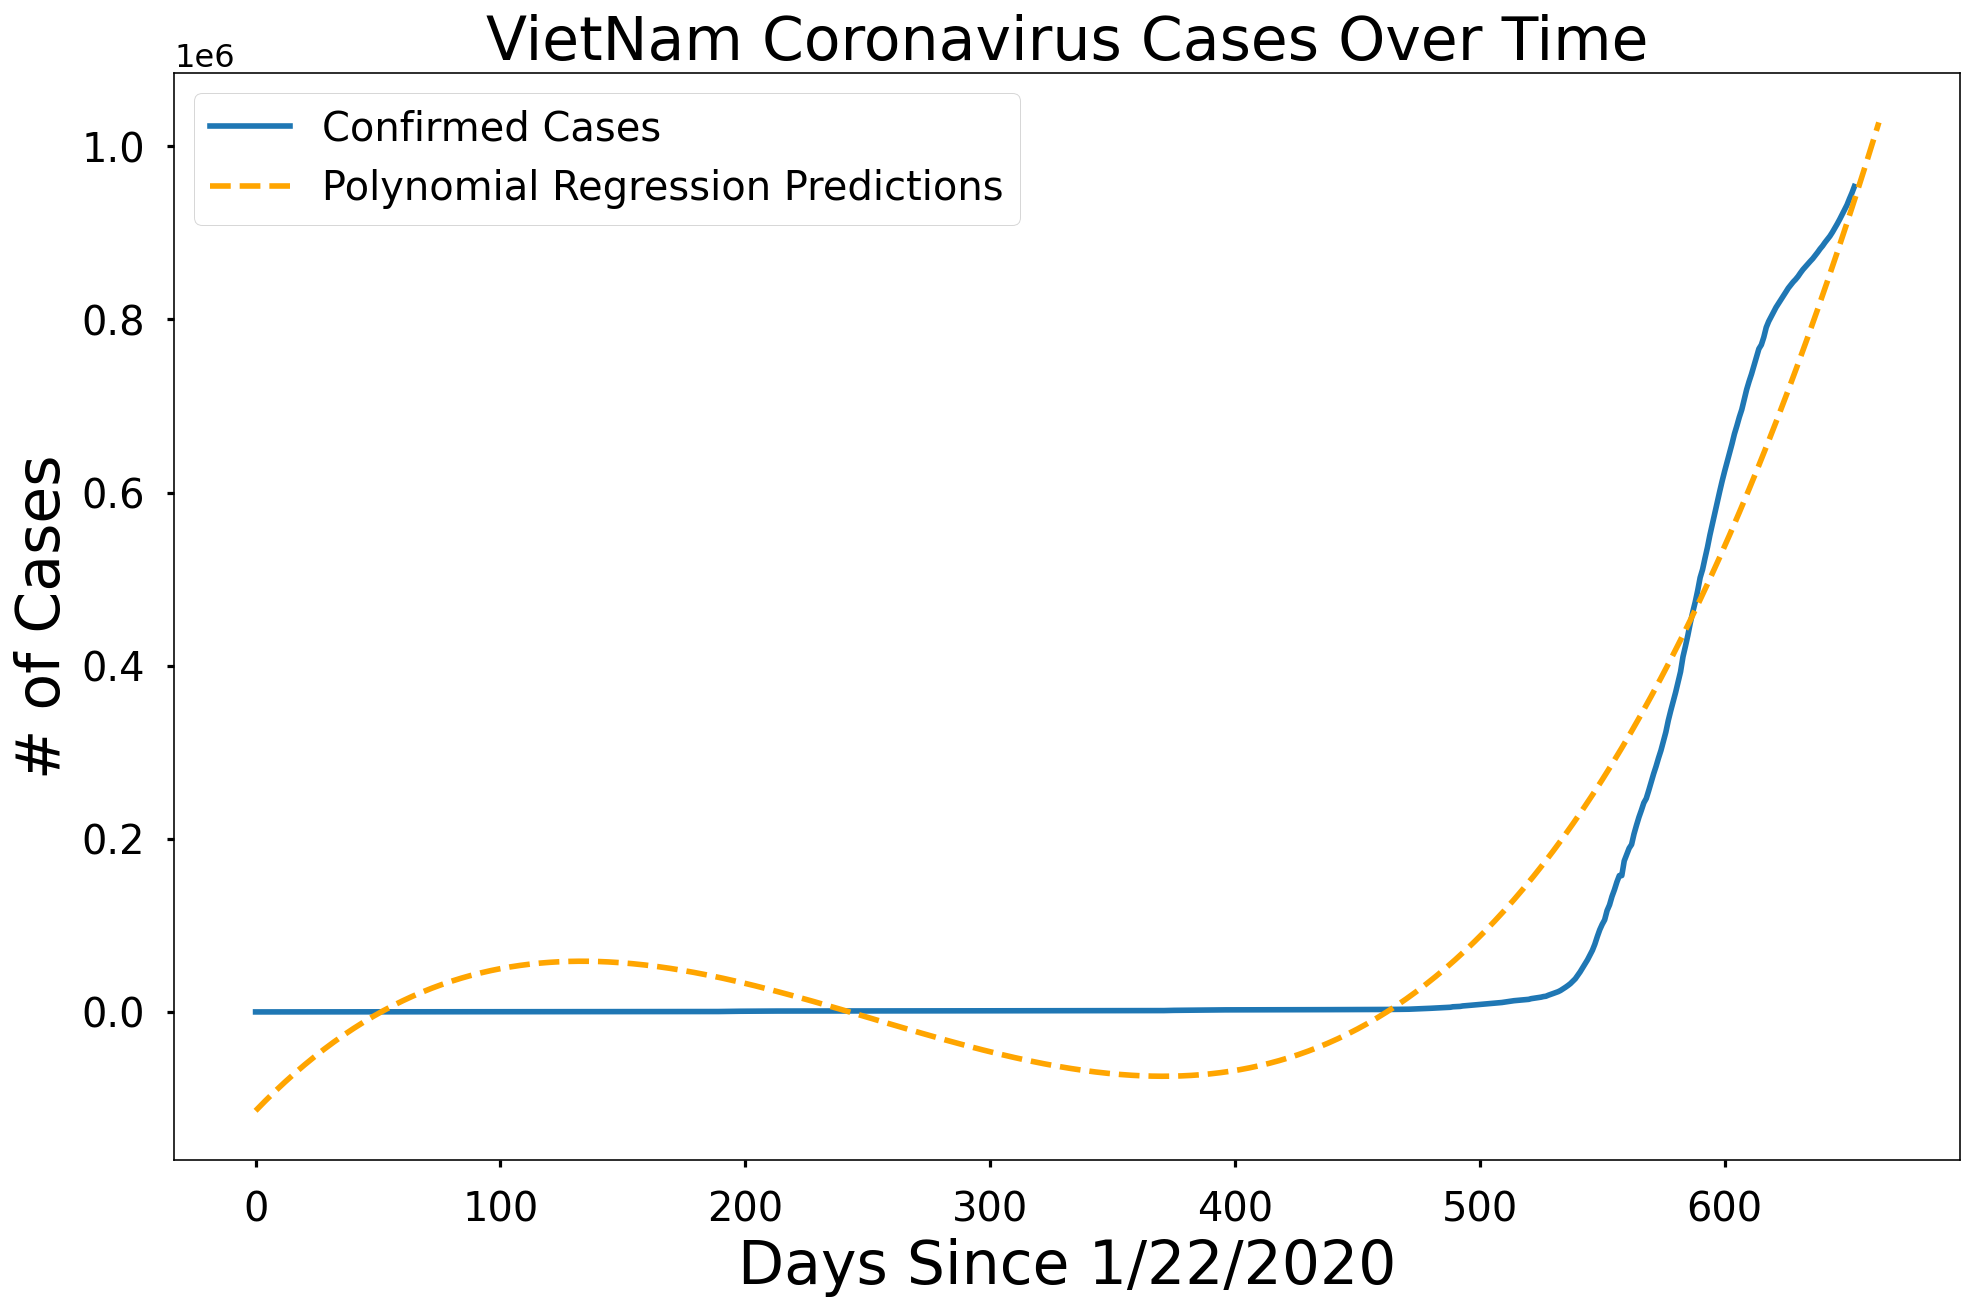

In [ ]:
plot_predictions(adjusted_dates, Vietnam_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

In [ ]:
# Table 
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Vietnam': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of Confirmed Cases Vietnam
0,11/06/2021,946432.000000
1,11/07/2021,955256.000000
2,11/08/2021,964128.000000
3,11/09/2021,973049.000000
4,11/10/2021,982018.000000
5,11/11/2021,991035.000000
6,11/12/2021,1000100.000000
7,11/13/2021,1009215.000000
8,11/14/2021,1018378.000000
9,11/15/2021,1027590.000000


#Start training with Polynomial Regression (Death)

In [ ]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22[0:], Vietnam_deaths[0:], test_size=0.08, random_state=0) 

In [ ]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forcast = poly.fit_transform(future_forcast)

In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_death, y_train_death)
test_linear_pred = linear_model.predict(poly_X_test_death)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred, y_test_death))

MAE: 1469.6206670918582
MSE: 3264670.1145598954


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test_death,test_linear_pred))

0.9226516746807556


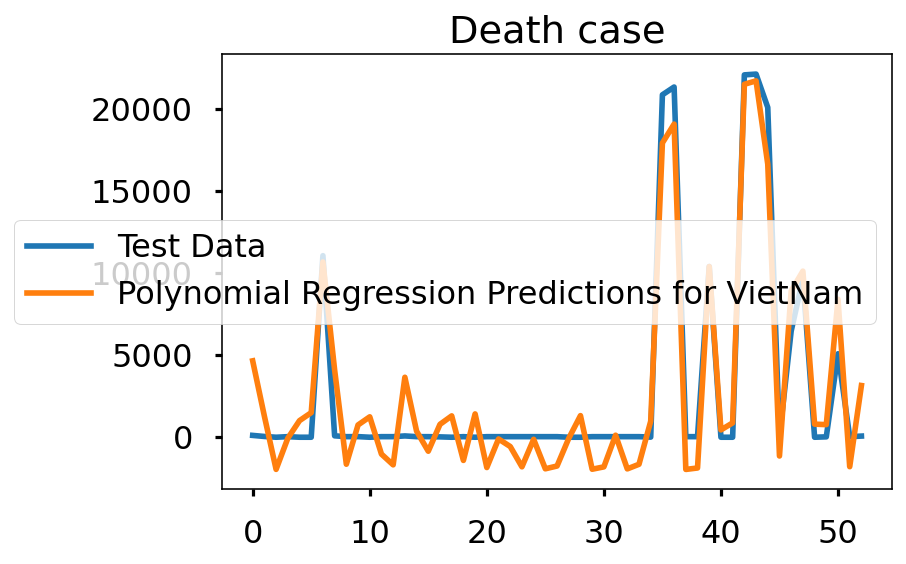

In [ ]:
plt.plot(y_test_death)
plt.plot(test_linear_pred)
plt.title('Death case')
plt.legend(['Test Data', 'Polynomial Regression Predictions for VietNam'])

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('VietNam Coronavirus Death Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Death Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

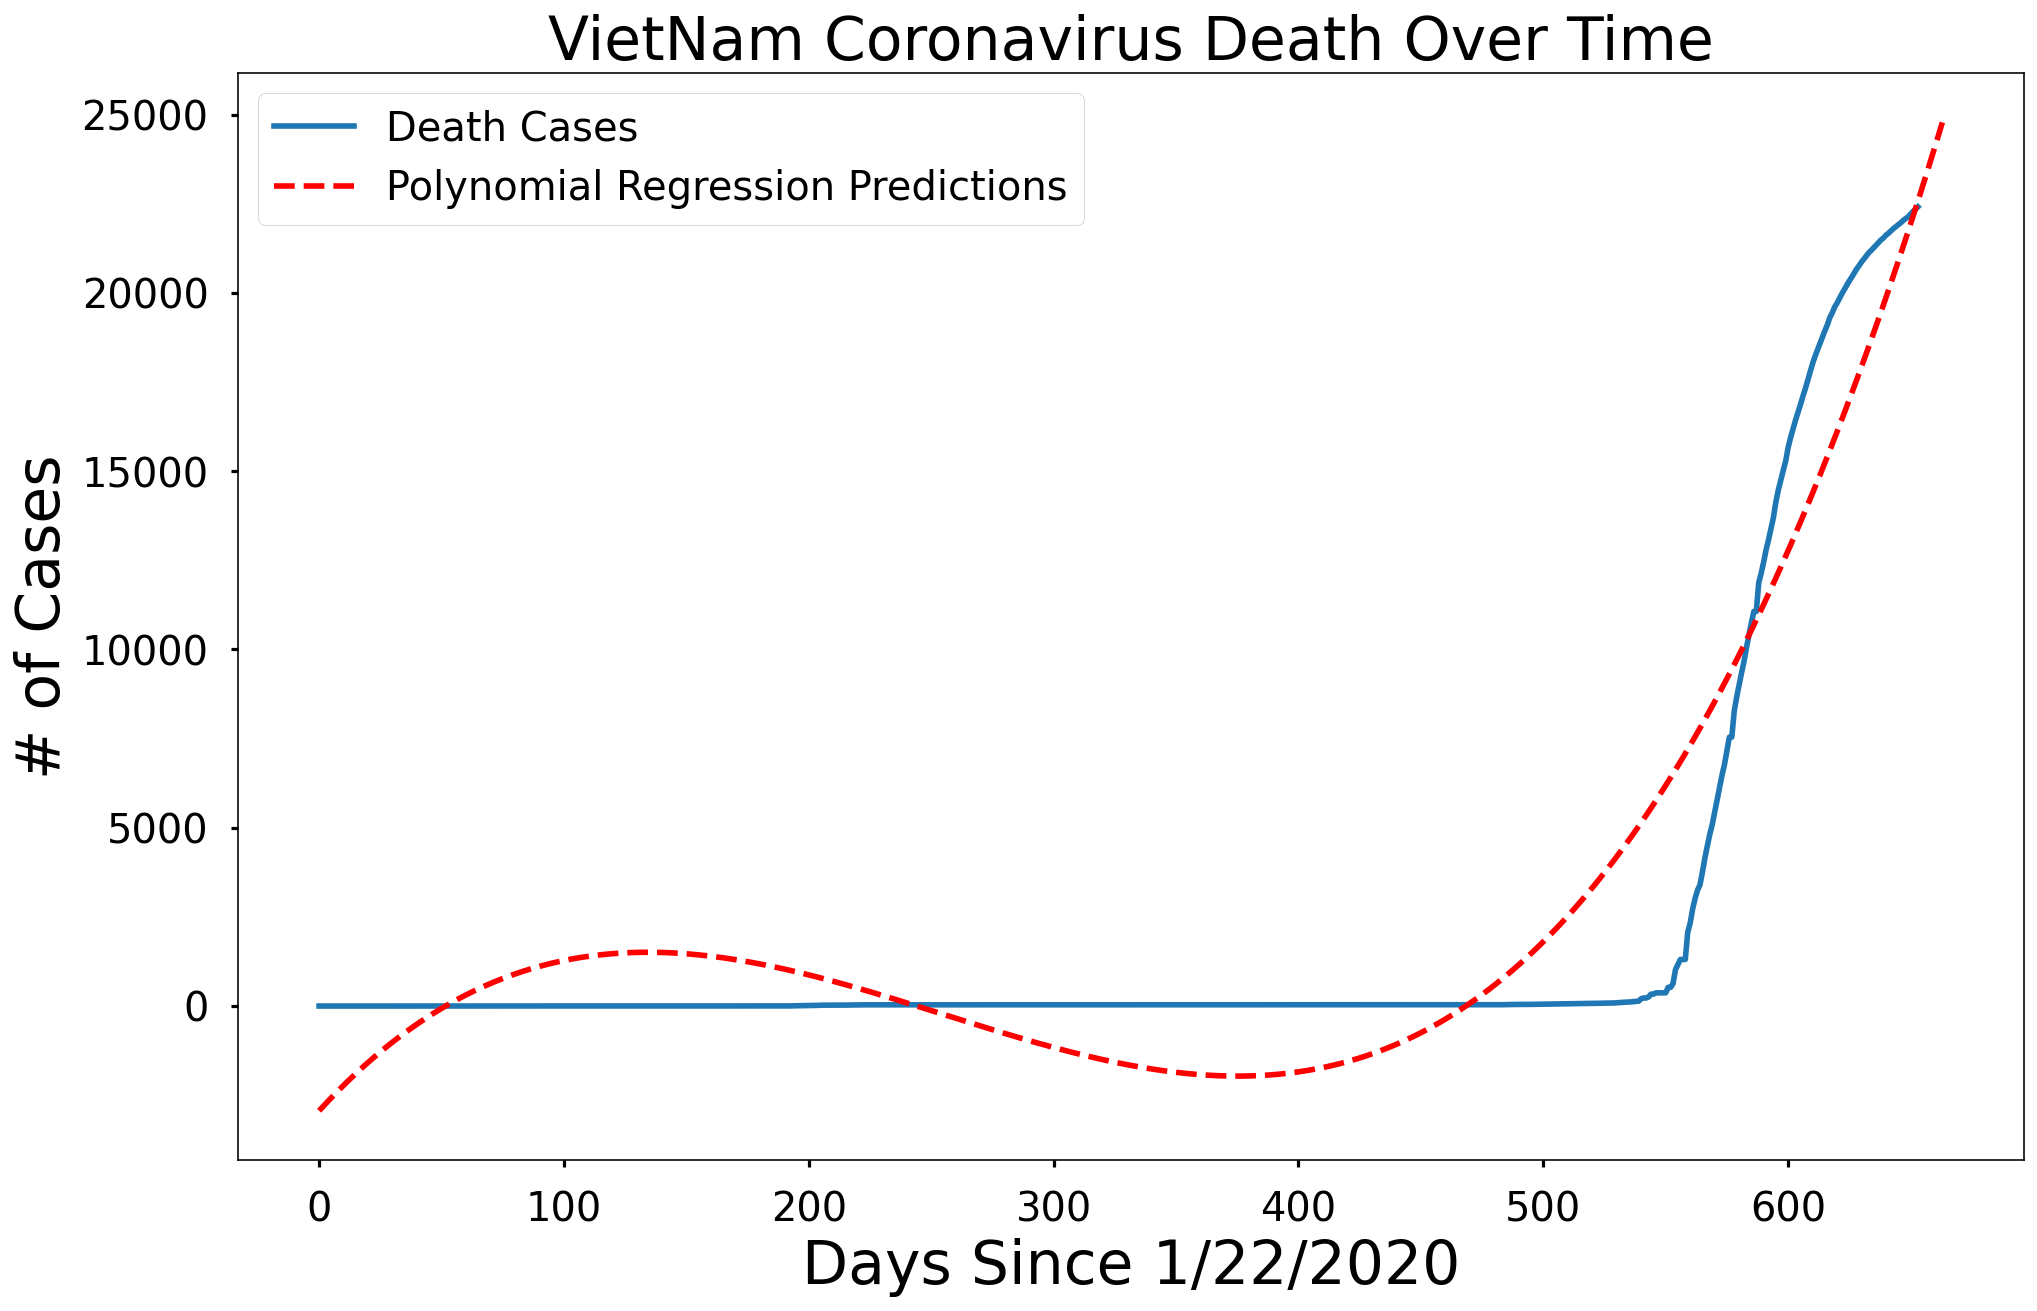

In [ ]:
plot_predictions(adjusted_dates, Vietnam_deaths, linear_pred, 'Polynomial Regression Predictions', 'red')

In [ ]:
# Table 
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Death Cases Vietnam': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of Death Cases Vietnam
0,11/06/2021,22785.000000
1,11/07/2021,23002.000000
2,11/08/2021,23220.000000
3,11/09/2021,23439.000000
4,11/10/2021,23659.000000
5,11/11/2021,23881.000000
6,11/12/2021,24104.000000
7,11/13/2021,24328.000000
8,11/14/2021,24553.000000
9,11/15/2021,24779.000000


#Start training with Polynomial Regression(Daily Increased)

In [ ]:
X_train_increased, X_test_increased, y_train_increased, y_test_increased = train_test_split(days_since_1_22[0:], Vietnam_daily_increase[0:], test_size=0.1, random_state=0) 


In [ ]:
poly = PolynomialFeatures(degree=4)
poly_X_train_increased = poly.fit_transform(X_train_increased)
poly_X_test_increased = poly.fit_transform(X_test_increased)
poly_future_forcast = poly.fit_transform(future_forcast)


In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_increased, y_train_increased)
test_linear_pred = linear_model.predict(poly_X_test_increased)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_increased))
print('MSE:',mean_squared_error(test_linear_pred, y_test_increased))

MAE: 1389.1651448161917
MSE: 4467169.959577017


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test_increased,test_linear_pred))

0.5481701969978497


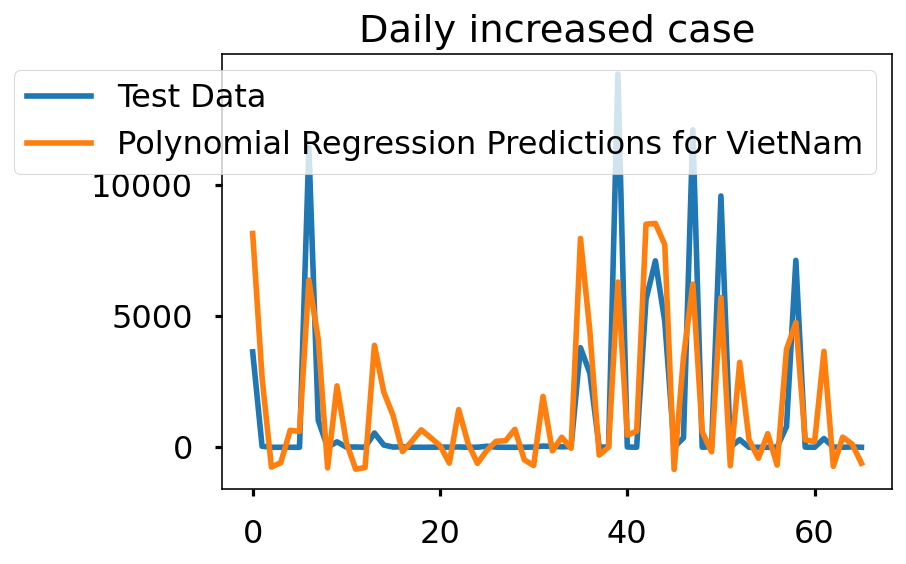

In [ ]:
plt.plot(y_test_increased)
plt.plot(test_linear_pred)
plt.title('Daily increased case')
plt.legend(['Test Data', 'Polynomial Regression Predictions for VietNam'])

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('VietNam Coronavirus daily increased over time', size=25)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Increased Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

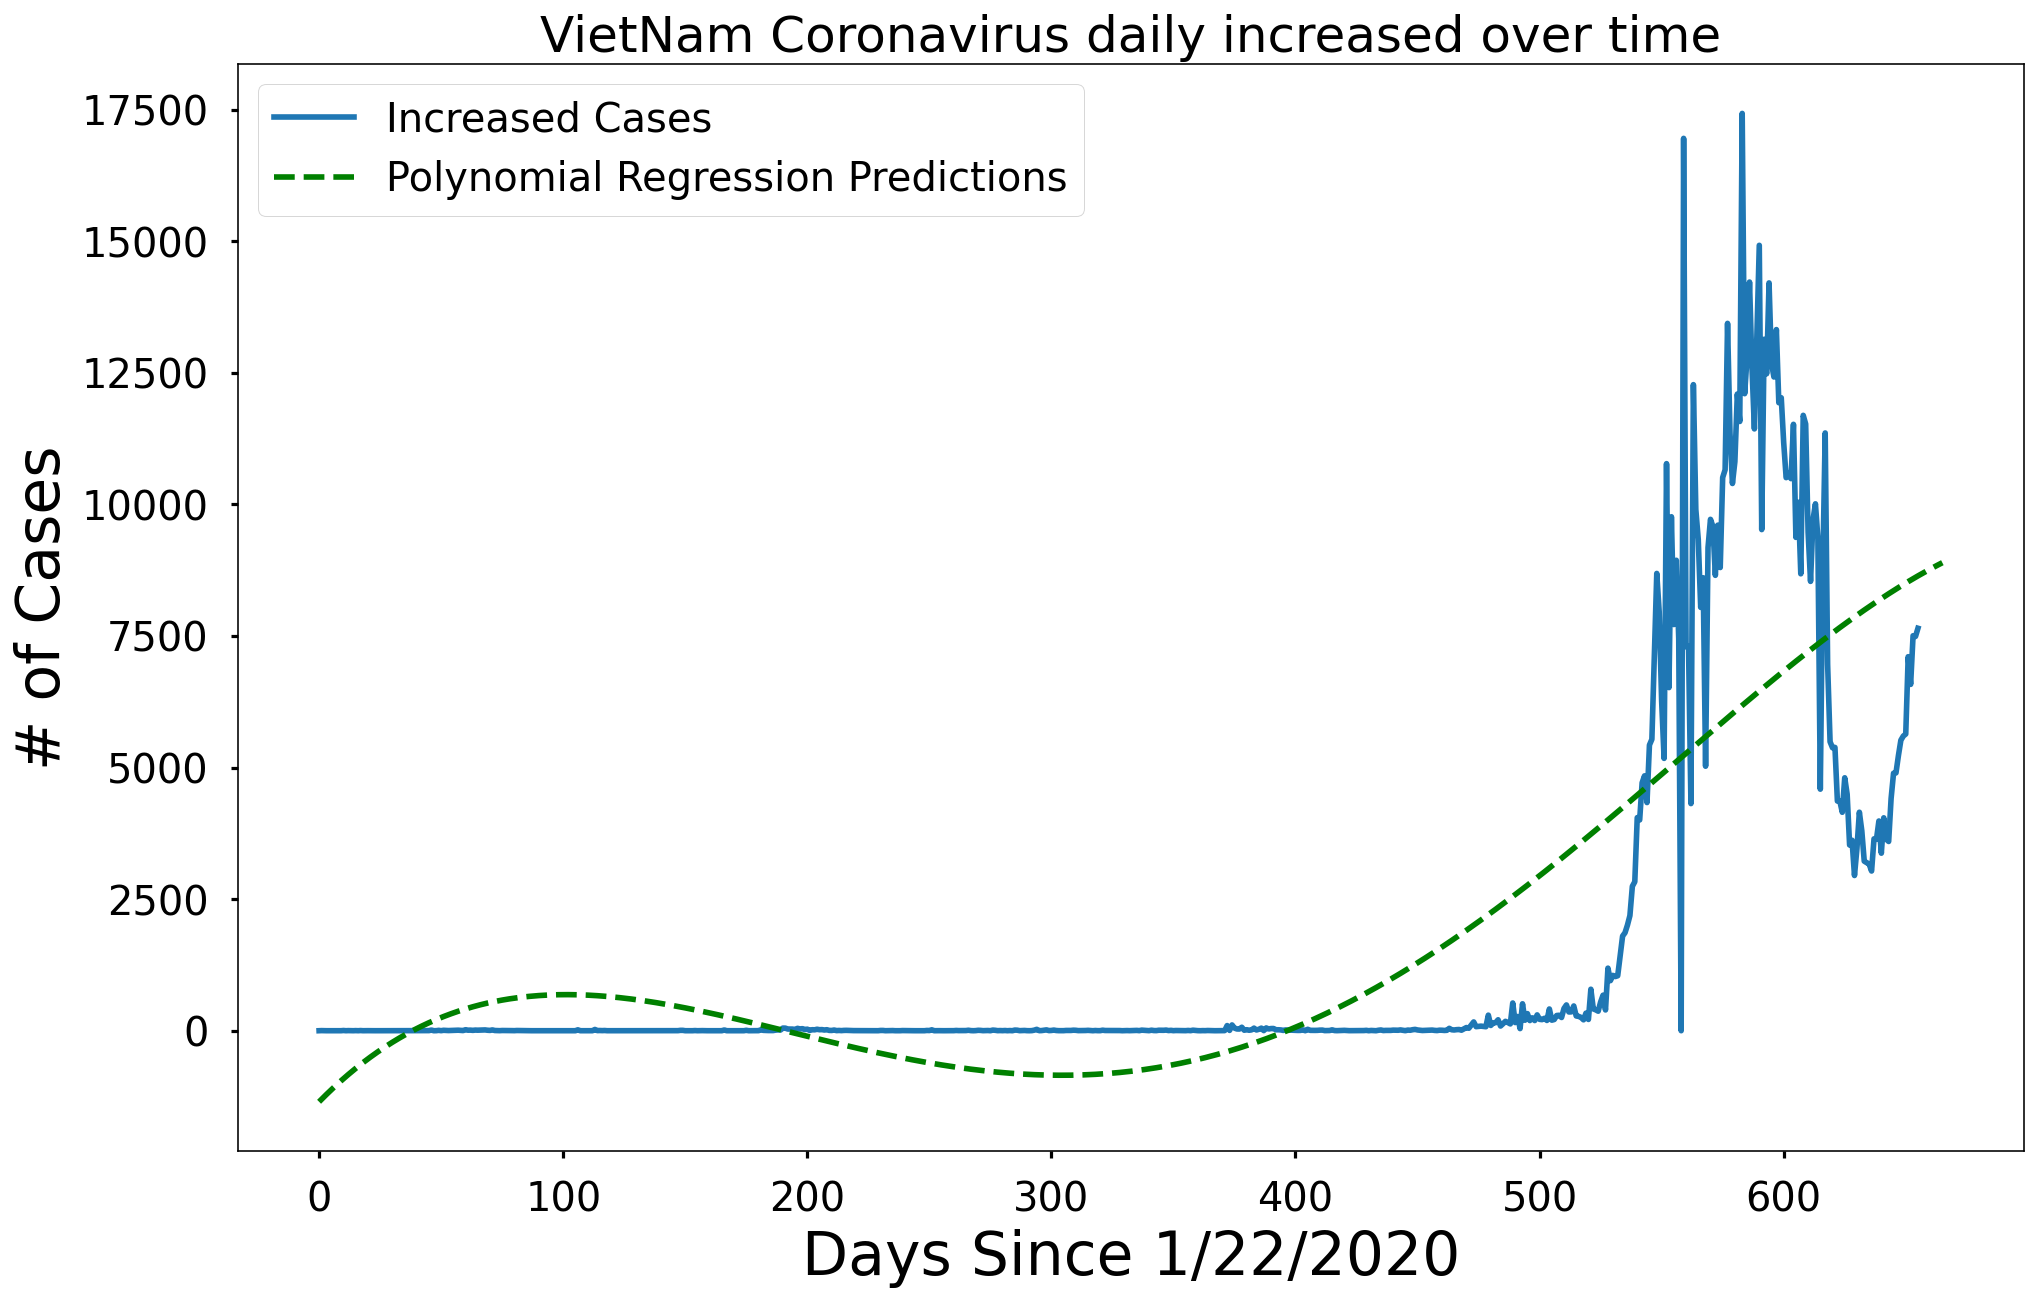

In [ ]:
plot_predictions(adjusted_dates, Vietnam_daily_increase, linear_pred, 'Polynomial Regression Predictions', 'green')

In [ ]:
# Table 
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Daily Increased Cases Vietnam': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of Daily Increased Cases Vietnam
0,11/08/2021,8667.000000
1,11/09/2021,8694.000000
2,11/10/2021,8720.000000
3,11/11/2021,8745.000000
4,11/12/2021,8770.000000
5,11/13/2021,8795.000000
6,11/14/2021,8820.000000
7,11/15/2021,8844.000000
8,11/16/2021,8868.000000
9,11/17/2021,8892.000000


# Start training with Random Forest (Daily Increased)